# *Why Machine Learning in Education?*
Ensuring universal access to quality education is a key priority globally. Yet, according to the independent report for the European Commission, student dropout remains a pressing challenge due to a variety of social, economic, and demographic factors. Even in the most successful country (Denmark), only around 80% of students complete their studies, while in Italy, this rate is only 46% [1].

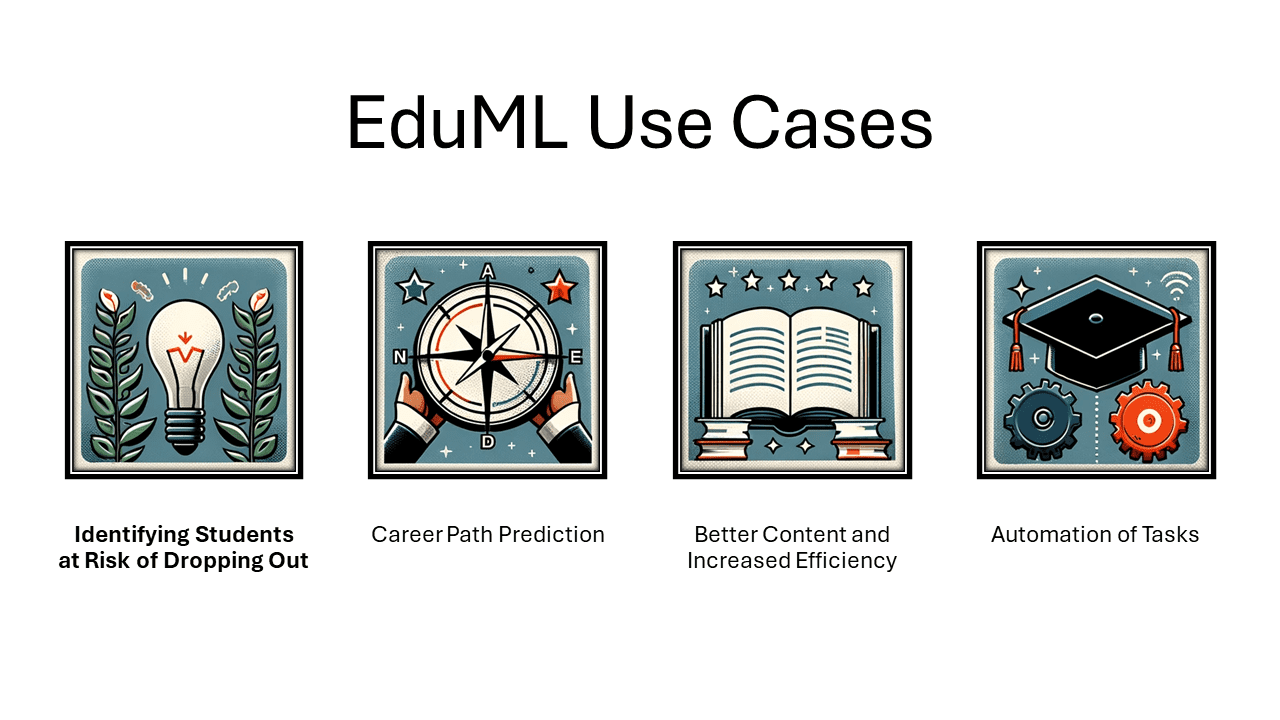

# Data Analysis & Machine Learning for University Dropout Predictions
This study utilizes the "Predict Students' Dropout and Academic Success" dataset from Kaggle, provided by thedevastator, to explore the factors influencing student dropout. Aimed at enhancing student retention and creating supportive educational environments, this analysis progresses through data preprocessing, exploratory analysis, and predictive modeling.

#### Notebook Documentation and Commenting Practices
Explanatory comments within the code are denoted by the '#' symbol. Additional observations are presented as text within the notebook for clarity.
***

## Data Loading and Preprocessing
This foundational step involves loading the dataset and preparing it for analysis. It's crucial for ensuring the dataset's cleanliness and structure are conducive to accurate model building. By meticulously cleaning and preprocessing the data, we lay the groundwork for robust machine learning modeling.
***
### Importing Necessary Libraries
Essential libraries such as Pandas and NumPy are imported for data manipulation, while Matplotlib and Seaborn are used for data visualization. These libraries offer a broad range of functions that simplify data analysis and the graphical representation of data.

In [1]:
# Importing essential libraries for data manipulation (Pandas, NumPy) and visualization (Matplotlib, Seaborn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and Initial Exploration of the Dataset
Displaying the first few rows of the dataset to provide a snapshot of the available data, facilitating an initial qualitative assessment. This step is essential for understanding the dataset's structure and informing the direction of the analysis. Of particular interest are the variables 'Curricular units'.

In [2]:
# Loading the dataset and displaying the first few rows to understand the structure and type of data available

df = pd.read_csv('/kaggle/input/higher-education-predictors-of-student-retention/dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
#Renaming the column 'Nacionality' to 'Nationality' and 'Target' to 'Student Status'

df.rename(columns = {'Nacionality':'Nationality', 'Target': 'Student Status'}, inplace = True)

In [4]:
df.shape # Reviewing the dataset's dimensions (total number of rows and columns)

(4424, 35)

In [5]:
df.info() #Displaying a summary of each column's data type and non-null values in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [6]:
print("Number of missing values per column:\n", df.isnull().sum()) # Identifying missing values in the dataset

Number of missing values per column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International             

In [7]:
print("Number of duplicate values per column:\n", df.duplicated().sum()) # Identifying duplicate values in the dataset

Number of duplicate values per column:
 0


#### Handling Missing Data in Machine Learning Projects
In real-world data science projects, encountering datasets with missing values is more the norm than the exception. Missing data can arise due to various reasons, ranging from data entry errors and lost data to non-response in surveys and incomplete records. For data missing completely at random, simple imputation techniques such as Mean/Median/Mode or removal might suffice. However, for more complex patterns of missingness, advanced techniques like KNN imputation, regression imputation, or multiple imputation may be more appropriate. It's also crucial to consider the computational resources available and the potential impact of each method on the analysis results.

### Encoding Categorical Variables
Transforming categorical variables into a numerical format is a critical preprocessing step for machine learning. This conversion enables the model to interpret these variables, paving the way for a more nuanced analysis and better predictive performance.

In [8]:
print(df["Student Status"].unique()) #Visualizing 'Student Status' non-numeric fields in the dataset

['Dropout' 'Graduate' 'Enrolled']


In [9]:
# Transforming 'Student Status' values into numerical format, making them interpretable by machine learning algorithms

df['Student Status'] = df['Student Status'].map({'Dropout' : 0, 'Enrolled': 1, 'Graduate': 2})

In [10]:
print(df["Student Status"].unique()) #Visualizing 'Student Status' numeric fields in the dataset

[0 2 1]


### Correlation Analysis between 'Student Status' and Other Features"
The code df.corr()['Student Status'] calculates and displays the Pearson correlation coefficients between the 'Student Status' column and all other columns in the dataframe, providing insights into the linear relationships between 'Student Status' and each feature. Correlations close to 0 imply little to no linear relationship. However, it's important to note that correlation does not imply causation, and non-linear relationships are not captured by Pearson's correlation.

In [11]:
df.corr()['Student Status']

Marital status                                   -0.089804
Application mode                                 -0.212025
Application order                                 0.089791
Course                                            0.007841
Daytime/evening attendance                        0.075107
Previous qualification                           -0.091365
Nationality                                      -0.004740
Mother's qualification                           -0.038346
Father's qualification                            0.000329
Mother's occupation                               0.048424
Father's occupation                               0.051702
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.409827
Gender                                           -0.229270
Scholarship holder                                0.2975

To explore non-linear relationships between features and the target variable, we will use Spearman's rank correlation, which assesses how well the relationship between two variables can be described using a monotonic function.

In [12]:
# Calculating Spearman's Rank Correlation
spearman_corr = df.corr(method='spearman')['Student Status'].sort_values(ascending=False)

# Displaying the Spearman's Rank Correlation
print("Spearman's Rank Correlation with Student Status:")
print(spearman_corr)

Spearman's Rank Correlation with Student Status:
Student Status                                    1.000000
Curricular units 2nd sem (approved)               0.654049
Curricular units 1st sem (approved)               0.594194
Curricular units 2nd sem (grade)                  0.559820
Curricular units 1st sem (grade)                  0.497341
Tuition fees up to date                           0.400283
Scholarship holder                                0.301103
Curricular units 2nd sem (enrolled)               0.241456
Curricular units 1st sem (enrolled)               0.230576
Displaced                                         0.113241
Application order                                 0.102185
Daytime/evening attendance                        0.073066
GDP                                               0.053497
Curricular units 2nd sem (credited)               0.035004
Mother's occupation                               0.032700
Father's occupation                               0.032265
Curricu

### Cleaning the Dataset
Dataset cleaning focuses on refining the dataset for analysis, by removing irrelevant columns and addressing any data quality issues. This approach ensures that our model focuses on meaningful attributes that directly impact academic success, thus enhancing the model’s predictive accuracy and efficiency. Columns below show correlation coefficients between -0.05 and 0.05 from both the Spearman and Pearson correlation analyses, suggesting a weak relationship with 'Student Status'.

In [13]:
# Removing unnecessary columns that won't contribute to the analysis or model building
df = df.drop(columns=['Nationality', 'International', 'Educational special needs', 'Course',
                      'Mother\'s qualification','Father\'s qualification',
                      'Mother\'s occupation', 'Father\'s occupation', 
                      'Curricular units 1st sem (credited)', 'Curricular units 1st sem (evaluations)',
                      'Unemployment rate', 'Inflation rate', 'GDP'], axis=1)
df.head()

,Marital status,Application mode,Application order,Daytime/evening attendance,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,...,Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Student Status
0,1,8,5,1,1,1,0,1,1,0,...,0,0.000000,0,0,0,0,0,0.000000,0,0
1,1,6,1,1,1,1,0,0,1,0,...,6,14.000000,0,0,6,6,6,13.666667,0,2
2,1,1,5,1,1,1,0,0,1,0,...,0,0.000000,0,0,6,0,0,0.000000,0,0
3,1,8,2,1,1,1,0,1,0,0,...,6,13.428571,0,0,6,10,5,12.400000,0,2
4,2,12,1,0,1,0,0,1,0,0,...,5,12.333333,0,0,6,6,6,13.000000,0,2


### Feature Engineering to Enhance Predictive Power
The core objective of feature engineering is to transform the existing data into more meaningful predictors that can increase the accuracy of the model. Interaction features are particularly useful to capture the combined effect of two or more variables, while aggregated features can provide a higher-level summary of the student's academic trajectory.

In [14]:
# Creating interaction features for academic performance
df['Interaction_CU_1st_2nd_Approved'] = df['Curricular units 1st sem (approved)'] * df['Curricular units 2nd sem (approved)']
df['Interaction_CU_1st_2nd_Grade'] = df['Curricular units 1st sem (grade)'] * df['Curricular units 2nd sem (grade)']

# Creating aggregated features
df['Total_CU_Approved'] = df['Curricular units 1st sem (approved)'] + df['Curricular units 2nd sem (approved)']
df['Total_CU_Grade'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Dropping the original features to reduce multi-collinearity
columns_to_drop = ['Curricular units 1st sem (approved)', 'Curricular units 2nd sem (approved)',
                   'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',]
df.drop(columns_to_drop, axis=1, inplace=True)

# Exploratory Data Analysis (EDA)
EDA is a critical step in understanding the dataset deeply, revealing patterns, anomalies, and correlations through visual and statistical analysis. This thorough examination helps in identifying significant predictors for student attrition, guiding the subsequent modeling efforts with informed decisions.
***
## Breaking Down Student Status: Graduates, Enrollments, and Dropouts Proportions
This pie chart delineates the distribution of student academic statuses within the dataset. It reveals that 32.12% of students have not continued their education, highlighting a dropout rate that warrants attention and intervention.

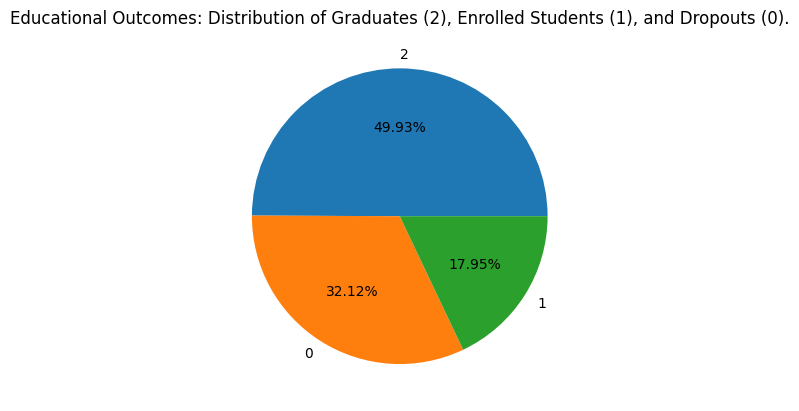

In [15]:
# Visualizing the distribution of Graduates vs. Dropouts vs. Enrolled to understand the performance baseline

categories_counts = df['Student Status'].value_counts()
plt.pie(categories_counts.values, labels=categories_counts.index, autopct='%1.2f%%')

plt.title('Educational Outcomes: Distribution of Graduates (2), Enrolled Students (1), and Dropouts (0).')
plt.show()

## Comprehensive Analysis of Predictors Influencing Student Status
This section undertakes an exhaustive analysis of a variety of factors to understand their influence on Student Status within an academic setting:
* A correlation matrix heatmap elucidates the intricate relationships between different variables.
* A bar graph of the top 10 features with the highest correlation to Student Status allows for an immediate identification of the most significant predictors.
* A Factors Ranker heatmap ranks these features and also provides an aesthetic and ordered visualization.

Collectively, these visual analytics tools create a powerful narrative about the determinants of student success and retention in educational institutions.

### Feature Correlation Insight
The heatmap's correlation matrix provides a detailed view into the relationships between various factors and their impact on Student Status. A negative correlation between factors such as Age at Enrollment and Student Status indicates a tendency where older enrolment age could negatively affect the student's academic standing. In contrast, the total number of Curricular Units approved displays a strong positive correlation, suggesting that successful course completion is indicative of positive student status. Despite these patterns, the complex interplay of numerous variables within this high-dimensional dataset makes isolating specific predictors for Student Status challenging.

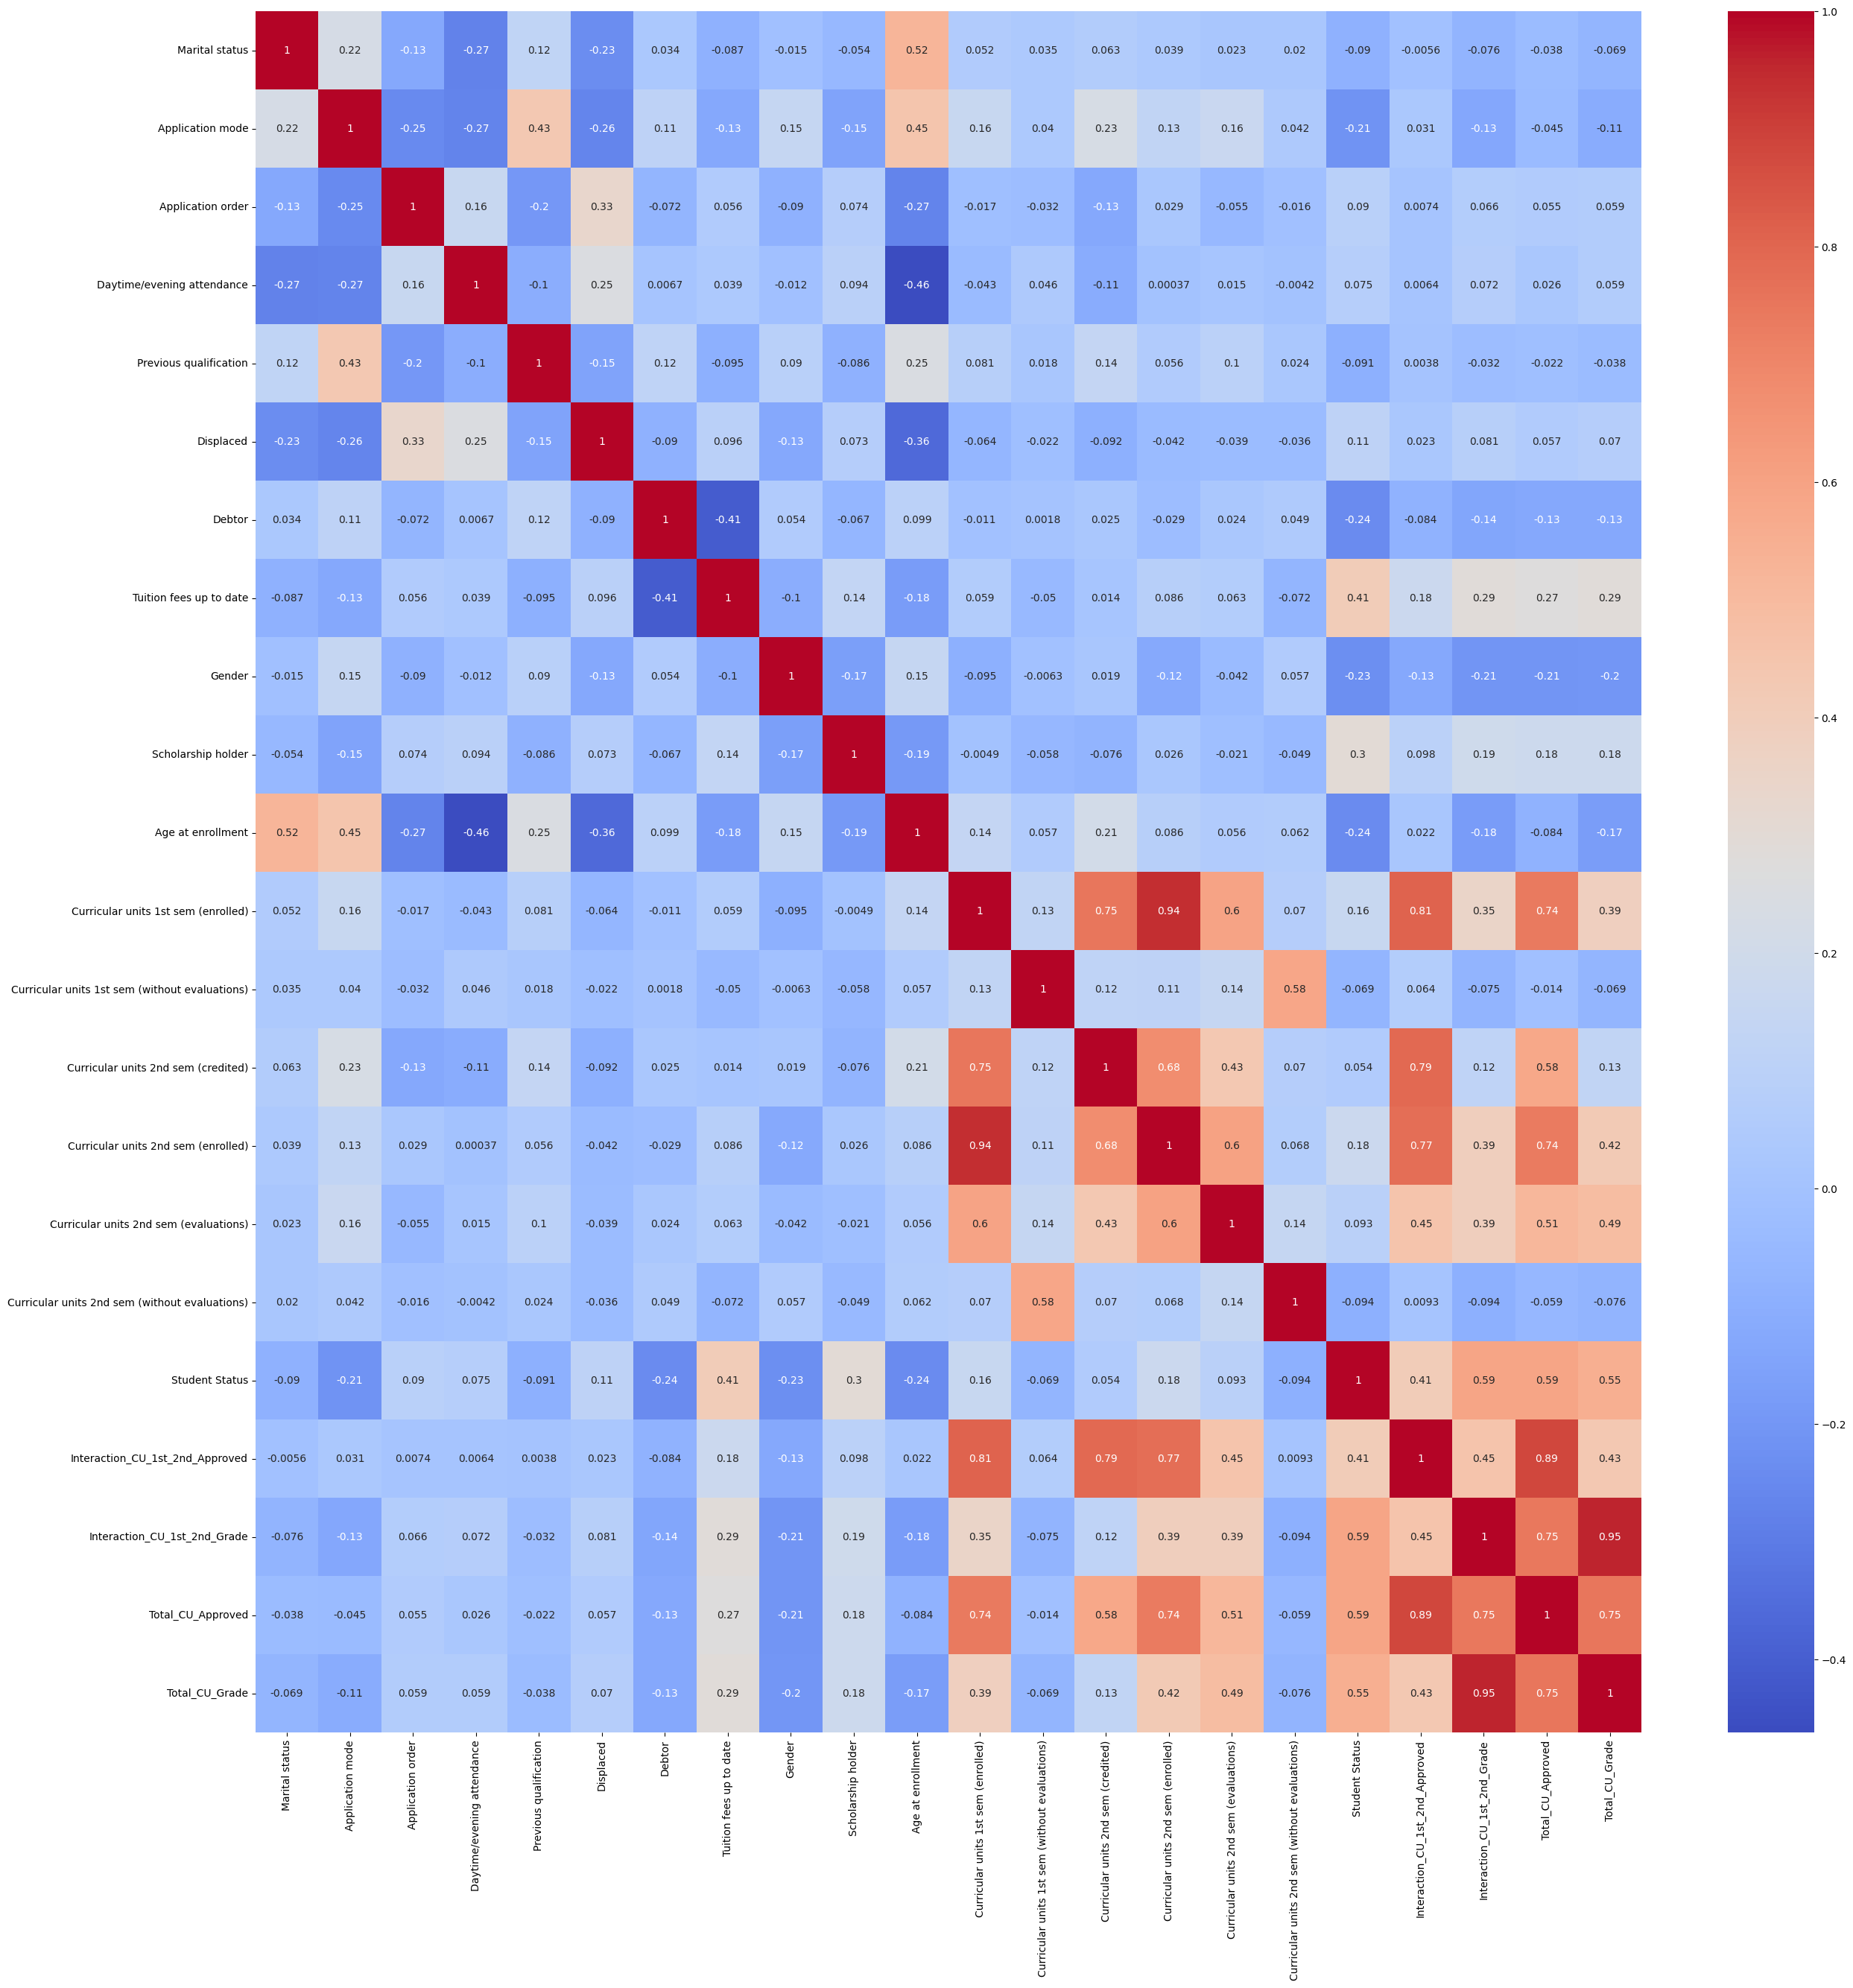

In [16]:
# Analyzing the correlation between various features with a heatmap to identify potential predictors for Student Status

plt.figure(figsize=(30,30))
ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Identifying Key Predictors for Student Success
This section presents a statistical analysis aimed at pinpointing the top 10 features that are most strongly correlated with Student Status. By calculating the correlation of all features with Student Status and selecting the ten with the highest absolute values, we derive a clear ranking. The resulting bar chart visualizes these relationships, providing a straightforward depiction of which factors are most influential in determining Student Status, ranging from academic performance metrics like Curricular Units' grades and approvals to financial factors such as Tuition Fees and Scholarship holdings.

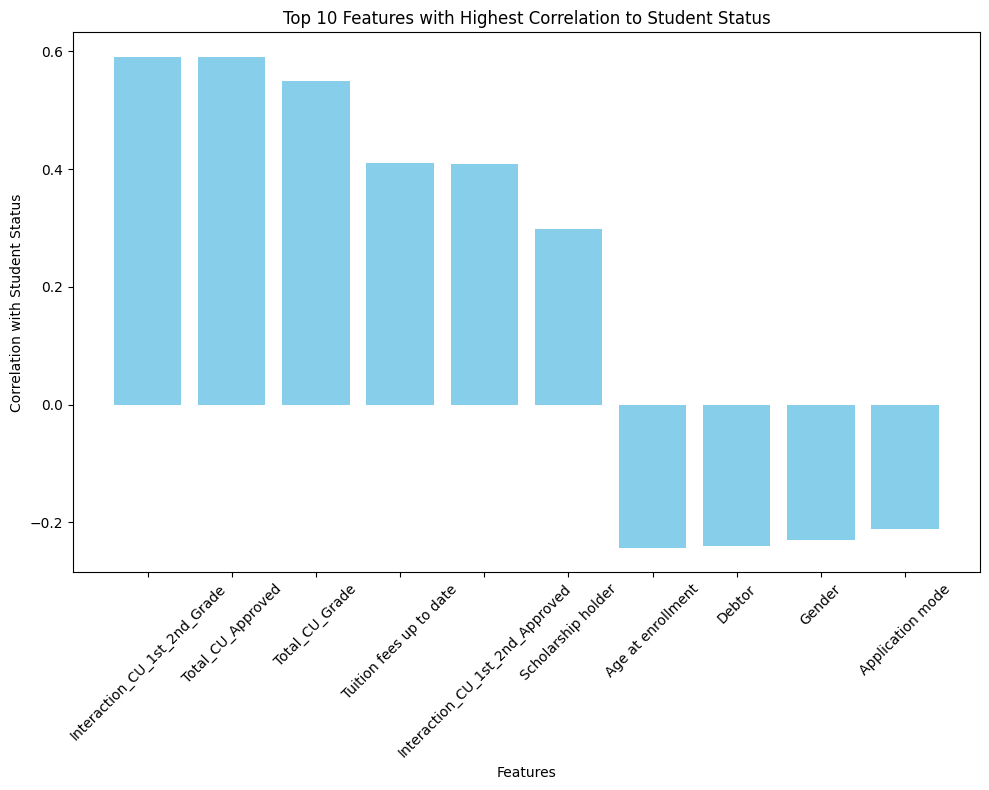

In [17]:
# Recalculating correlations to ensure consistency
correlations = df.corr()['Student Status'].drop('Student Status')
top_10_features = correlations.abs().nlargest(10).index
top_10_corr_values = correlations[top_10_features].values

# Plotting the top 10 features
plt.figure(figsize=(10, 8))
plt.bar(x=top_10_features, height=top_10_corr_values, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Correlation with Student Status')
plt.title('Top 10 Features with Highest Correlation to Student Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Factors Ranker Visualization
The Factors Ranker heatmap offers a visually impactful and ordered representation of the correlation between Student Status and selected features. It ranks these features by their correlation strength, from the highest to the lowest. This ranking is crucial for identifying which variables most significantly affect Student Status, with academic performance once again showing a prominent influence. Such insights are invaluable for developing strategies to support student success. The graph's clear layout and annotations facilitate immediate understanding and interpretation of the data.

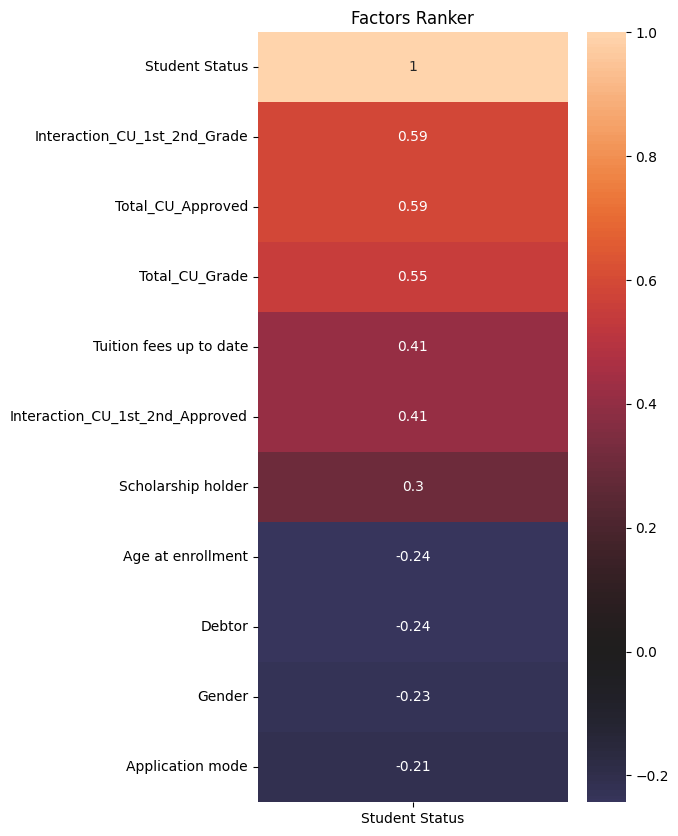

In [18]:
# Creating a new DataFrame with only the top 10 features and 'Student Status'
top_10_df = df[top_10_features.to_list() + ['Student Status']].copy()

# Computing the correlation matrix for these features
top_10_corr = top_10_df.corr()[['Student Status']]

# Sorting by absolute value while keeping the sign to place negative values below positives
sorted_corr = top_10_corr.sort_values(by='Student Status', key=lambda x: abs(x), ascending=False)

# Plotting the heatmap with custom sorting
plt.figure(figsize=(5, 10))
sns.heatmap(sorted_corr, annot=True, center=0)
plt.title('Factors Ranker')
plt.show()

## Academic Performance and Its Impact on Student Status
After exploring a range of factors affecting student status, this section visually dissect the effects of curricular unit completion and grades on the academic statuses of students, now considering the newly engineered features that reflect their combined effects.
### Impact of Interaction Between 1st and 2nd Semester Grades on Student Status
The first bar chart exhibits a clear upward trend in the interaction of grades from the first and second semesters from dropouts to graduates, suggesting that not just individual semester performance but the combined performance over semesters is a strong indicator of eventual graduation.

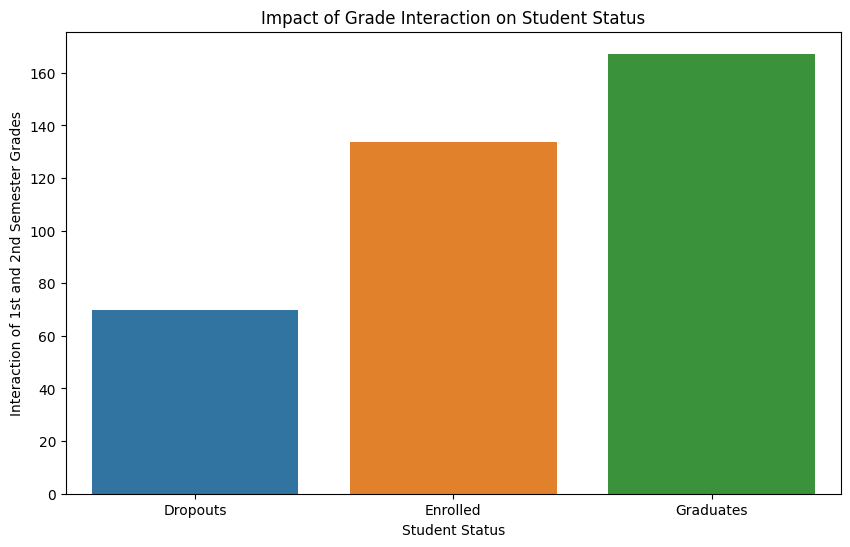

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Status', y='Interaction_CU_1st_2nd_Grade', data=df, errorbar=None)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Interaction of 1st and 2nd Semester Grades')
plt.title('Impact of Grade Interaction on Student Status')
plt.show()

### Impact of Total Approved Curricular Units on Student Status
The second chart shows the effect of the aggregated measure of curricular units approved in both semesters. Similar to the interaction feature, this aggregated measure is predictive of a student's ability to graduate.

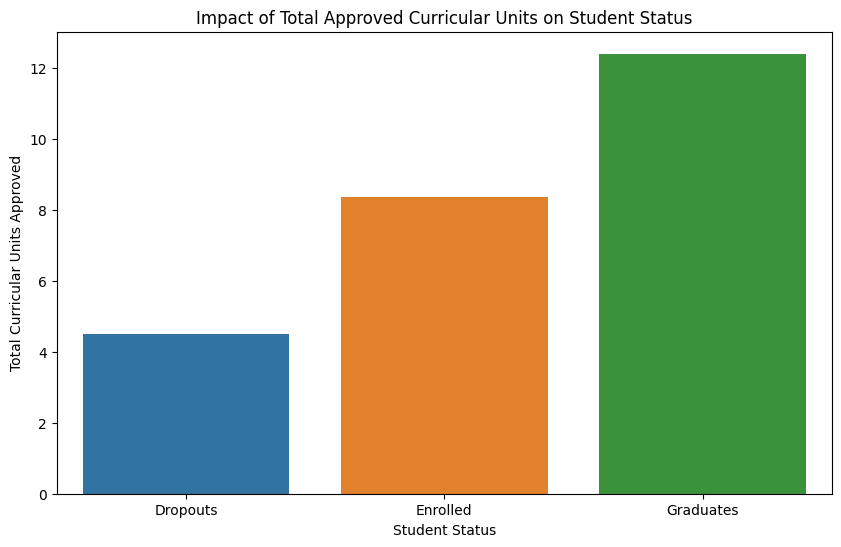

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Student Status', y='Total_CU_Approved', data=df, errorbar=None)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Total Curricular Units Approved')
plt.title('Impact of Total Approved Curricular Units on Student Status')
plt.show()

The consistent upward trends observed in these visual analyses support the importance of both cumulative achievements, such as the total number of approved curricular units, and the synergy between semesters' grades in the academic trajectory of students.

## Assessing the Role of Financial Status in Educational Progress
This section delves into the specific role of financial conditions on educational achievement. Through the analysis of debt, scholarship provision, and tuition fee payment status, we aim to understand the fiscal influences that may affect a student's academic journey.
### Debt and Educational Trajectories
The first stacked bar chart presents a striking visual contrast between students with and without debt across three educational status categories: enrollment, graduation, and dropout. The proportion of students who drop out is noticeably larger within the indebted group, suggesting a detrimental effect of financial obligations on educational continuity.

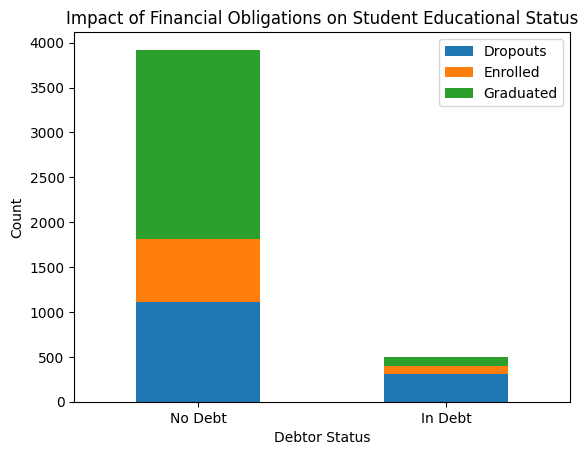

In [21]:
# Mapping Student Status numerical labels to descriptive labels for the legend
student_status_labels = {0: 'Dropouts', 1: 'Enrolled', 2: 'Graduated'}

# Mapping numerical labels to descriptive labels for Debtor status
debtor_status_labels = {0: 'No Debt', 1: 'In Debt'}

# Visualizing the impact of student debt on educational status
grouped = df.groupby(['Debtor', 'Student Status']).size().unstack()
grouped.rename(index=debtor_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Debtor Status')
plt.ylabel('Count')
plt.title('Impact of Financial Obligations on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

### Scholarships as a Support System
Next, the impact of scholarships is examined through another stacked bar chart. The distribution clearly shows a majority of scholarship recipients graduating, which could indicate that financial support is a significant factor in helping students complete their education.

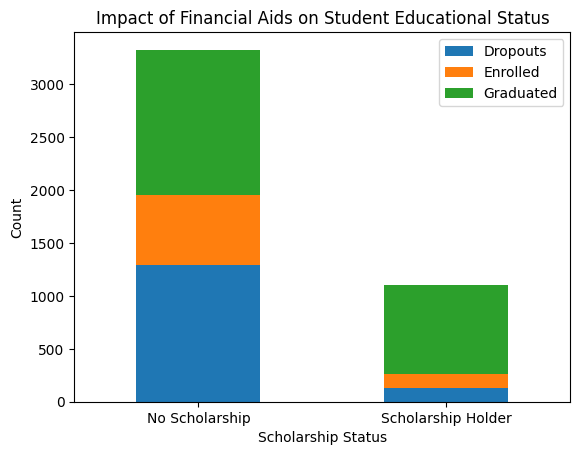

In [22]:
# Mapping numerical labels to descriptive labels for Scholarship status
scholarship_status_labels = {0: 'No Scholarship', 1: 'Scholarship Holder'}

# Visualizing the impact of scholarships on educational status
grouped = df.groupby(['Scholarship holder', 'Student Status']).size().unstack()
grouped.rename(index=scholarship_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Scholarship Status')
plt.ylabel('Count')
plt.title('Impact of Financial Aids on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

### Tuition Fees: A Predictive Financial Indicator
The final analysis focuses on the correlation between the status of tuition fee payments and student outcomes. The graph suggests that students with outstanding tuition fees have a higher likelihood of dropping out, making this factor a potent predictor of educational discontinuation.

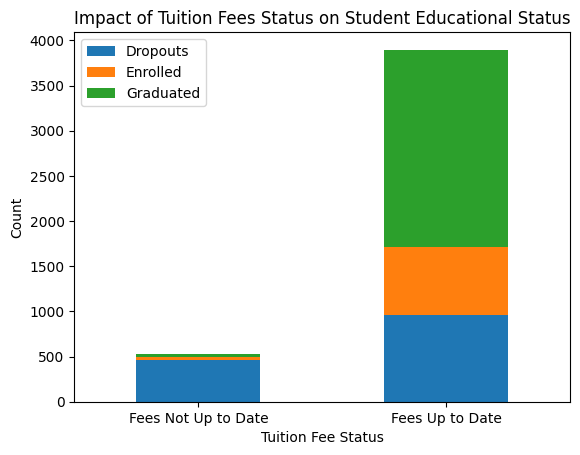

In [23]:
# Mapping numerical labels to descriptive labels for Tuition Fee status
tuition_fee_status_labels = {0: 'Fees Not Up to Date', 1: 'Fees Up to Date'}

# Visualizing the impact of tuition fees status on educational outcomes
grouped = df.groupby(['Tuition fees up to date', 'Student Status']).size().unstack()
grouped.rename(index=tuition_fee_status_labels, inplace=True)
grouped_plot = grouped.plot(kind='bar', stacked=True)

plt.xlabel('Tuition Fee Status')
plt.ylabel('Count')
plt.title('Impact of Tuition Fees Status on Student Educational Status')
plt.legend(labels=[student_status_labels.get(item, item) for item in grouped.columns])
plt.xticks(rotation=0)
plt.show()

In these analyses, it is evident that financial status not only affects the present educational standing but also has long-term implications on a student's educational trajectory. Addressing these financial challenges could be crucial in supporting student retention and success.

## The Interplay of Age and Gender in Academic Progression
This section investigates the impact of demographic factors, specifically age and gender, on student academic status. By analyzing the age distribution at enrollment and the relationship between age and student status, along with the gender dynamics, we aim to uncover patterns that could be influential in educational attainment and retention.

### Age Distribution Analysis
The histogram depicts the age distribution at the time of enrollment among the student population. With most students enrolling between the ages of approximately 18 to 22, a skewed distribution is evident, highlighting a typical college-age demographic. This trend diminishes significantly with increasing age, suggesting a traditional focus on younger students within the academic system.

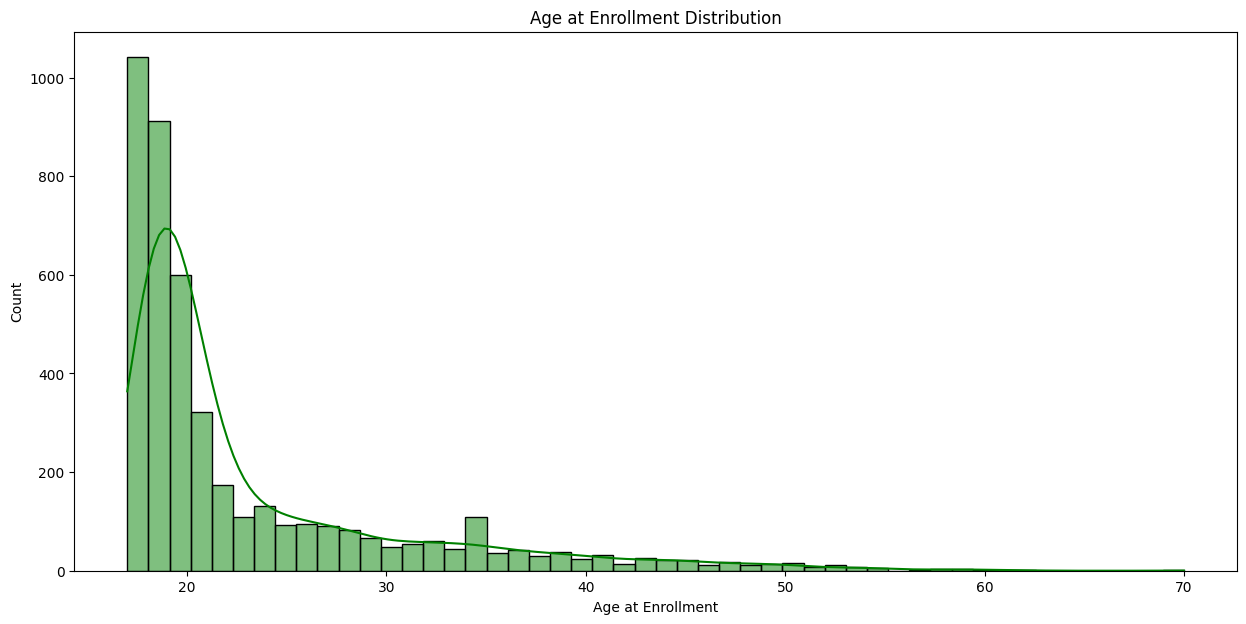

In [24]:
# Converting inf to NaN in the 'Age at enrollment' column
df['Age at enrollment'] = df['Age at enrollment'].replace([np.inf, -np.inf], np.nan)

# Ignoring FutureWarnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(15, 7))
ax = sns.histplot(df['Age at enrollment'], bins=50, color='g', kde=True)
ax.set_title('Age at Enrollment Distribution')
ax.set_xlabel('Age at Enrollment')
ax.set_ylabel('Count')
plt.show()

### Dynamics of Age in Student Outcomes
The box plot showcases the age distribution in relation to student status, categorizing students into graduates, dropouts, and currently enrolled. Graduates tend to be younger, with a narrower age range suggesting a more uniform path to completion. In contrast, dropouts have a wider age range, indicating that dropping out affects a broader demographic. Current students have ages closely aligned with graduates, implying consistent enrollment ages.

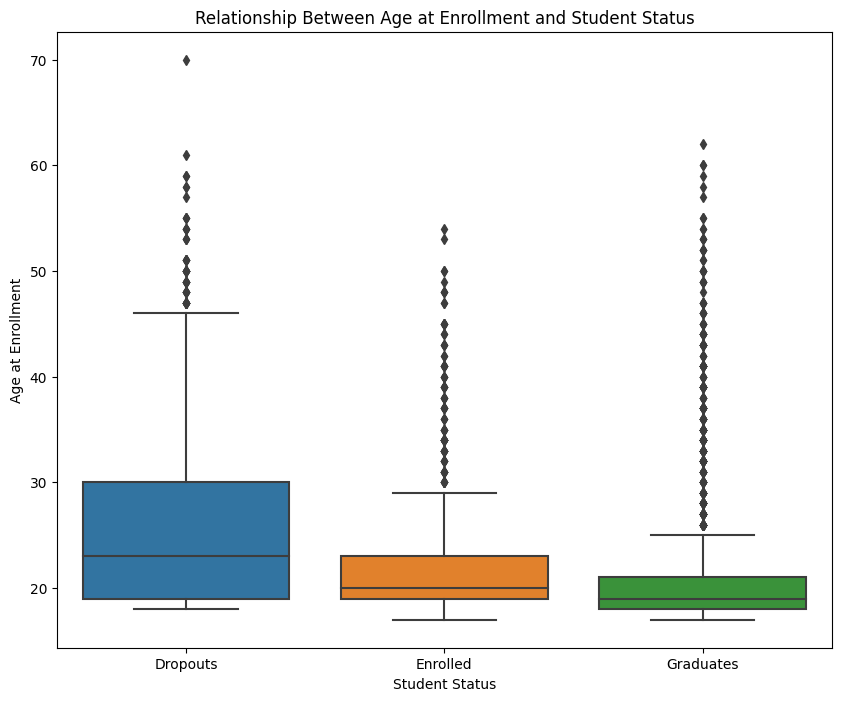

In [25]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Student Status', y='Age at enrollment', data=df)
plt.xticks([0, 1, 2], ['Dropouts', 'Enrolled', 'Graduates'])
plt.xlabel('Student Status')
plt.ylabel('Age at Enrollment')
plt.title('Relationship Between Age at Enrollment and Student Status')
plt.show()

### Gender's Influence on Educational Trajectories
The count plot examines the distribution of student status by gender, revealing that while the total number of males and females may be similar, their academic statuses differ. This visual suggests potential gender-based disparities in academic persistence or success that warrant further exploration.

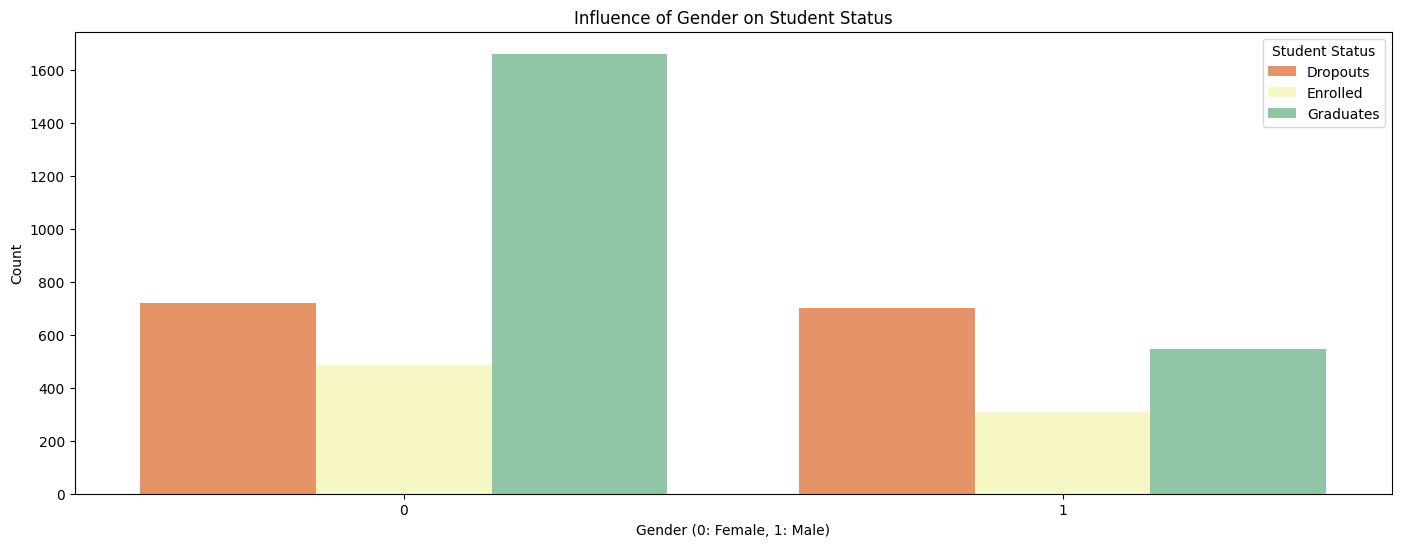

In [26]:
plt.figure(figsize=(17, 6))
sns.countplot(x='Gender', hue='Student Status', data=df, palette='Spectral')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.legend(title='Student Status', labels=['Dropouts', 'Enrolled', 'Graduates'])
plt.title('Influence of Gender on Student Status')
plt.show()

Incorporating these findings into academic support strategies could potentially help tailor interventions and support services to the specific needs and challenges within the student body.

# Comprehensive Predictive Analysis for Student Status Determination
This section outlines the predictive modeling workflow, encompassing data collection, preparation, model selection, training, evaluation, and refinement. The objective is to predict students' status (e.g., Enrolled, Dropout, Graduate) based on various input features. This approach integrates multiple machine learning techniques to ensure accurate predictions and insights, guiding decision-making processes in educational settings.
***
## Preparing the dataset for predictive modeling
This step involves splitting the dataset into features (X) and the target variable (y), where the target variable is the 'Student Status' of students. The dataset is then divided into training and testing sets to assess the model's performance on unseen data.

In [27]:
from sklearn.model_selection import train_test_split

# Preparing the data: Separating features and target label
X = df.drop('Student Status', axis=1)
y = df['Student Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Determining the number of components needed for dimensionality reduction
Principal Component Analysis (PCA) reduces the dataset's dimensionality while retaining most variance. This process standardizes the feature set and determines the optimal number of principal components by examining the cumulative explained variance ratio. The aim is to select a minimal number of components that capture the maximum information about the dataset.

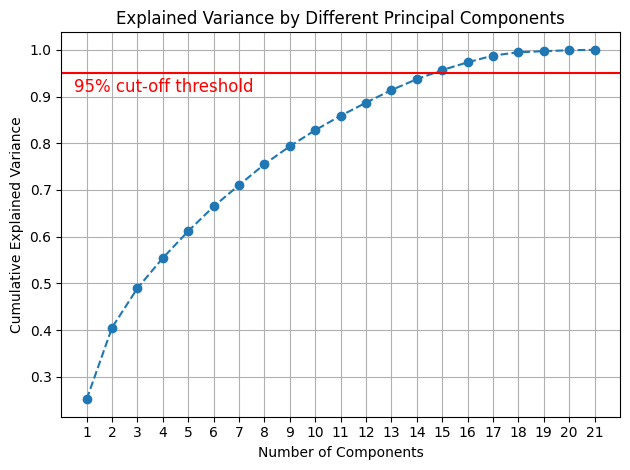

In [28]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Fitting PCA on the training
pca = PCA().fit(X_train_scaled)

# Visualizing the cumulative explained variance to determine the number of components needed
plt.figure()
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), 
         np.cumsum(pca.explained_variance_ratio_), 
         marker='o', linestyle='--')
plt.title('Explained Variance by Different Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)

# Drawing a horizontal line at 95% cumulative explained variance
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.91, '95% cut-off threshold', color = 'red', fontsize=12)

plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, step=1))

plt.grid(True)
plt.tight_layout()
plt.show()

## Configuring pipeline, hyperparameters, learning curves for model evaluation
This section sets up various machine learning models (Gradient Boosting, Random Forest, Logistic Regression, SVM, KNN) with respective pipelines including preprocessing steps (scaling, SMOTE for handling imbalanced classes, PCA for dimensionality reduction) and model-specific hyperparameters. It also involves configuring and plotting learning curves to visually assess the models' learning from the training data and performance on cross-validation.

In [29]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import learning_curve

# Configuring different machine learning models with hyperparameters and pipelines
models_config = {
    'Gradient Boosting': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [100, 150, 200],
            'model__learning_rate': [0.01, 0.05],
            'model__max_depth': [2, 3, 4],
            'model__subsample': [0.5, 0.75, 1.0],
            'model__validation_fraction': [0.1, 0.2],
            'model__n_iter_no_change': [10, 20, 30],
            'model__tol': [1e-4],
        }
    },
    'Random Forest': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': [100, 125],
            'model__max_depth': [3, 4],
            'model__min_samples_split': [4, 6],
            'model__min_samples_leaf': [2, 3],
            'model__max_features': ['log2'],
        }
    },
    'Logistic Regression': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', LogisticRegression(random_state=42))
        ]),
        'params': {
            'model__C': [0.005, 0.01, 0.05],
            'model__penalty': ['l1', 'l2'],
            'model__solver': ['liblinear'],
        }
    },
    'SVM': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'model__C': uniform(0.5, 2),
            'model__kernel': ['rbf', 'linear'],
        }
    },
    'KNN': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95, random_state=42)),
            ('model', KNeighborsClassifier())
        ]),
        'params': {
            'model__n_neighbors': randint(8, 14),
            'model__weights': ['uniform'],
        }
    }
}

# Configuring learning curves to identify if the models are underfitting or overfitting
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()

## Optimizing model parameters to enhance prediction accuracy
This step utilizes RandomizedSearchCV for hyperparameter tuning across defined machine learning models. It systematically searches through a subset of hyperparameter combinations to identify the best-performing ones based on cross-validation accuracy.

Starting search for: Gradient Boosting
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Gradient Boosting: 0.7121
Training Score for Gradient Boosting: 0.7513
Search completed for Gradient Boosting. Time taken: 0:03:22
Best parameters for Gradient Boosting: {'model__validation_fraction': 0.1, 'model__tol': 0.0001, 'model__subsample': 0.5, 'model__n_iter_no_change': 10, 'model__n_estimators': 150, 'model__max_depth': 2, 'model__learning_rate': 0.05}


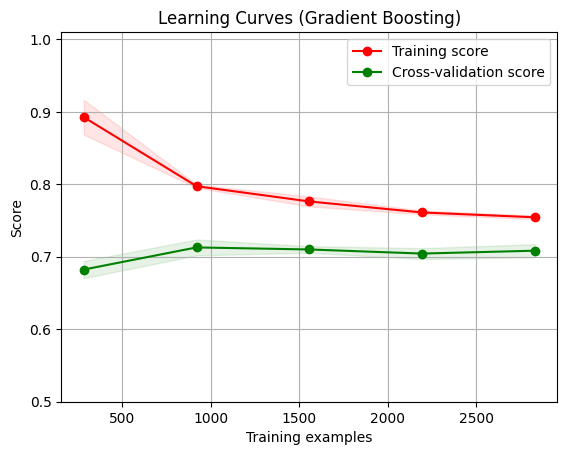

Starting search for: Random Forest
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Random Forest: 0.6900
Training Score for Random Forest: 0.7222
Search completed for Random Forest. Time taken: 0:00:26
Best parameters for Random Forest: {'model__n_estimators': 125, 'model__min_samples_split': 4, 'model__min_samples_leaf': 3, 'model__max_features': 'log2', 'model__max_depth': 4}


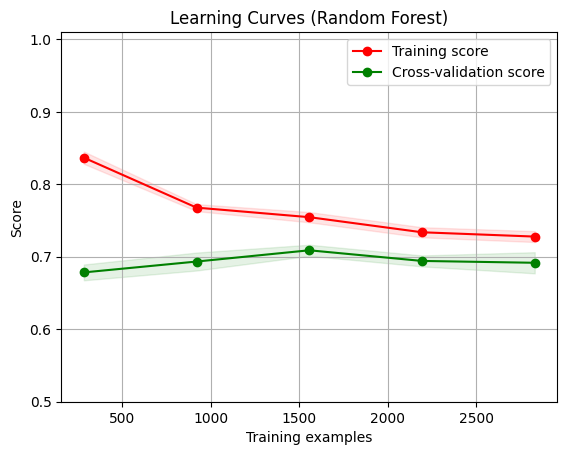

Starting search for: Logistic Regression
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for Logistic Regression: 0.7352
Training Score for Logistic Regression: 0.7352
Search completed for Logistic Regression. Time taken: 0:00:04
Best parameters for Logistic Regression: {'model__solver': 'liblinear', 'model__penalty': 'l2', 'model__C': 0.05}


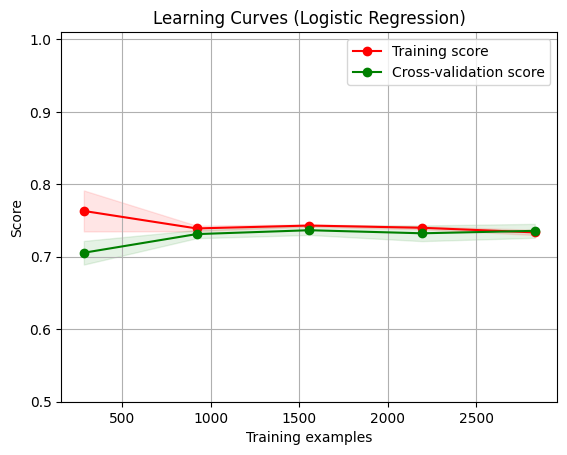

Starting search for: SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for SVM: 0.7231
Training Score for SVM: 0.7265
Search completed for SVM. Time taken: 0:02:16
Best parameters for SVM: {'model__C': 0.6161672243363989, 'model__kernel': 'linear'}


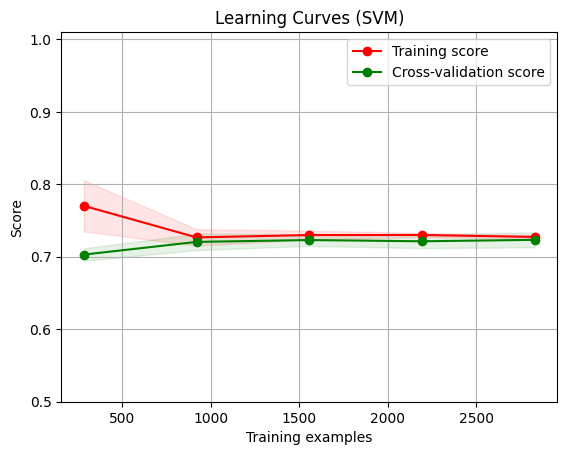

Starting search for: KNN
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Test score for KNN: 0.6536
Training Score for KNN: 0.7564
Search completed for KNN. Time taken: 0:00:05
Best parameters for KNN: {'model__n_neighbors': 9, 'model__weights': 'uniform'}


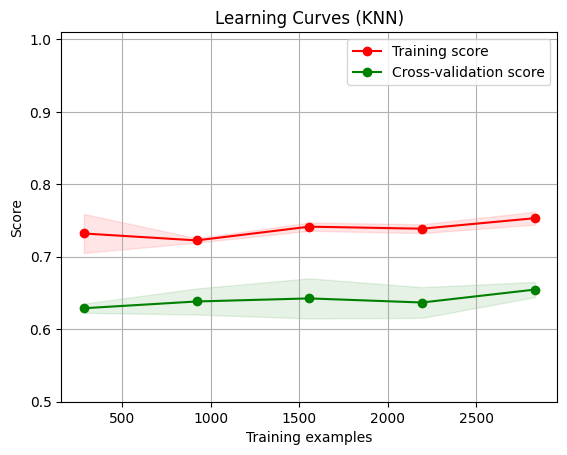

Total time for all model searches: 0:07:13


In [30]:
from sklearn.model_selection import RandomizedSearchCV
import time
from datetime import timedelta

best_models = {}
start_time = time.time()

# Performing RandomizedSearchCV
for name, config in models_config.items():
    print(f"Starting search for: {name}")
    search_start_time = time.time()
    
    search = RandomizedSearchCV(config['pipeline'], config['params'], n_iter=6, cv=5, scoring='accuracy', random_state=42, verbose=1)
    search.fit(X_train, y_train)

    best_models[name] = search.best_estimator_
    print(f"Test score for {name}: {search.best_score_:.4f}")
    
    # Comparing training set performance to the best CV score
    training_score = search.score(X_train, y_train)
    print(f"Training Score for {name}: {training_score:.4f}")
    
    elapsed_time = int(time.time() - search_start_time)
    print(f"Search completed for {name}. Time taken: {str(timedelta(seconds=elapsed_time))}")
    
    # Displaying the best parameters for the current model
    print(f"Best parameters for {name}: {search.best_params_}")
    
    # Plotting the learning curve for the best estimator
    plot_learning_curve(search.best_estimator_, f"Learning Curves ({name})", X_train, y_train, ylim=(0.5, 1.01), cv=5, n_jobs=4)
    
overall_time = int(time.time() - start_time)
print(f"Total time for all model searches: {str(timedelta(seconds=overall_time))}")

## Combining multiple models to improve prediction robustness
An ensemble model combines predictions from multiple machine learning models using a VotingClassifier with a soft voting mechanism. This approach often improves performance by reducing overfitting and increasing the robustness of predictions.

In [31]:
from sklearn.ensemble import VotingClassifier

# Combining multiple models into an ensemble VotingClassifier to improve prediction accuracy
ensemble = VotingClassifier(estimators=[(name, model) for name, model in best_models.items()],
                            voting='soft') # 'soft' voting considers the confidence level of predictions

ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('Gradient Boosting',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               GradientBoostingClassifier(learning_rate=0.05,
                                                                          max_depth=2,
                                                                          n_estimators=150,
                                                                          n_iter_no_change=10,
                                                                          random_state=42,
                                                                          subsample=0.5))])),
                             ('Random Forest',
                              Pipeline(steps=[('scal...
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               SVC(C=0.6161672243363989,
                                                   kernel='linear',
                                                   probability=True,
                                                   random_state=42))])),
                             ('KNN',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca',
                                               PCA(n_components=0.95,
                                                   random_state=42)),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=9))]))],
                 voting='soft')

## Assessment of Ensemble Model's Performance
Evaluating the ensemble model's performance typically involves accuracy, confusion matrix, and classification report. These metrics provide a comprehensive view of the model's capabilities and areas for improvement.

Ensemble model accuracy: 0.7028


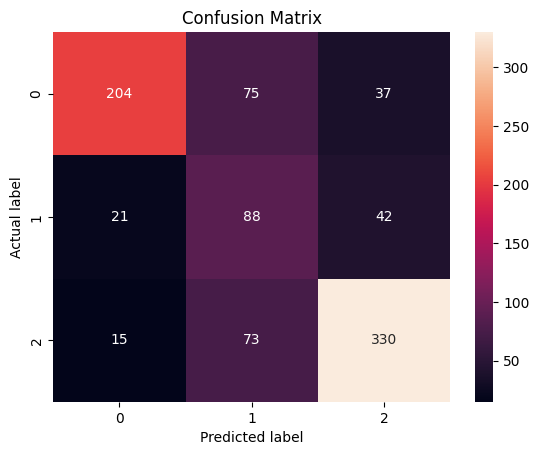

Test Accuracy: 0.7028
Training Accuracy: 0.7561

              precision    recall  f1-score   support

     Dropout       0.85      0.65      0.73       316
    Enrolled       0.37      0.58      0.45       151
    Graduate       0.81      0.79      0.80       418

    accuracy                           0.70       885
   macro avg       0.68      0.67      0.66       885
weighted avg       0.75      0.70      0.72       885



In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluating ensemble model performance on the test set
y_pred = ensemble.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Ensemble model accuracy: {accuracy:.4f}")

# Plotting the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Overfitting Check
train_accuracy = ensemble.score(X_train, y_train)
test_accuracy = ensemble.score(X_test, y_test)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}\n")

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Dropout', 'Enrolled', 'Graduate']))

### Assessing model discrimination capability across classes
ROC curves for each class evaluate the ensemble model's discriminative ability, with the area under the curve (AUC) indicating performance. Higher AUC values suggest better model sensitivity and specificity.

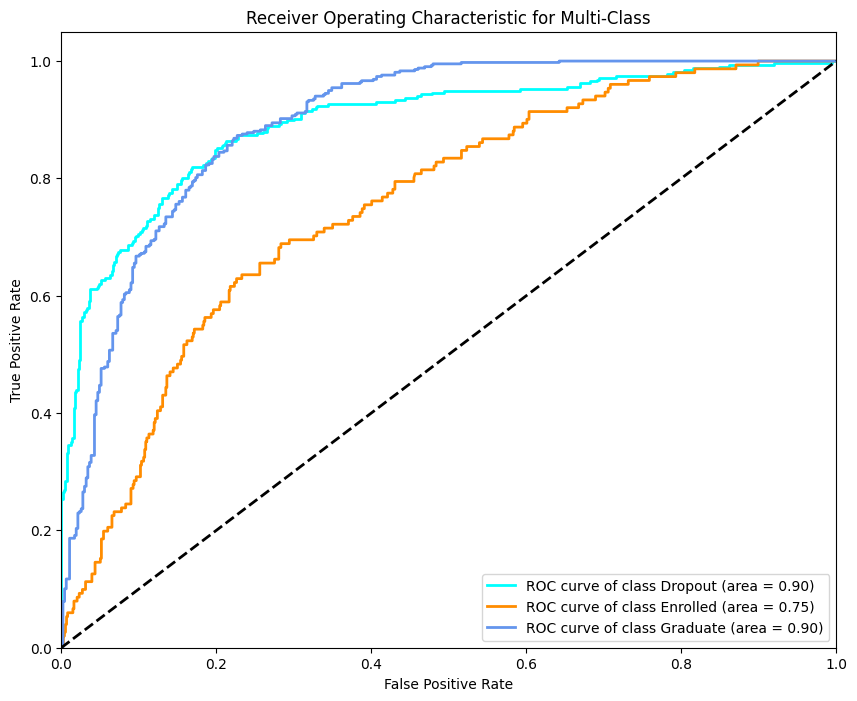

In [33]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

class_names = ['Dropout', 'Enrolled', 'Graduate']

# Binarizing the output labels for multi-class plotting
y_test_binarized = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_binarized.shape[1]

# Getting the probabilities for each class from your trained ensemble model
y_prob = ensemble.predict_proba(X_test)

# Computing ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves.
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {class_names[i]} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

### Evaluating the trade-off between precision and recall for each class
Precision-Recall curves are crucial for imbalanced datasets, offering a detailed look at the precision (classifier's accuracy) and recall (classifier's ability to find all positive samples) trade-off.

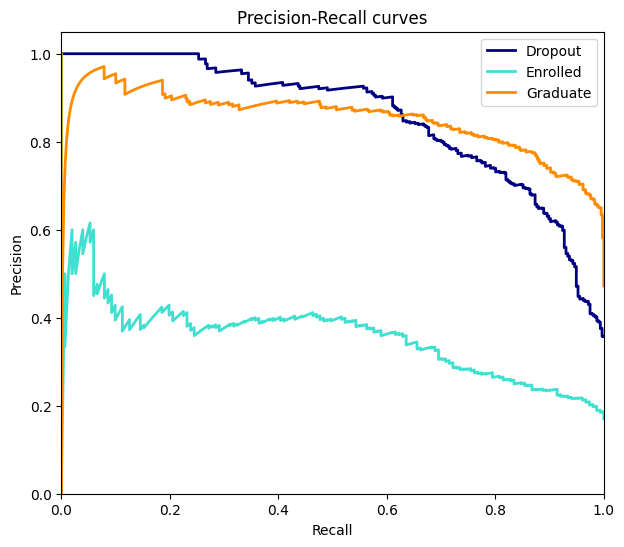

In [34]:
from sklearn.metrics import precision_recall_curve

# Calculating precision and recall for each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_binarized[:, i], y_prob[:, i])
    average_precision[i] = auc(recall[i], precision[i])

# Plotting the precision-recall curves
plt.figure(figsize=(7, 6))
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

for i, color in zip(range(n_classes), colors):
    plt.plot(recall[i], precision[i], color=color, lw=2,
             label=f'{class_names[i]}'
             ''.format(i, average_precision[i]))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curves')
plt.legend(loc="upper right")
plt.show()

## Exploring data distribution and model predictions in reduced dimensional space
t-SNE visualizes high-dimensional datasets, revealing how ensemble model predictions align with actual student statuses in 2D space, uncovering patterns, clusters, or confusion areas.

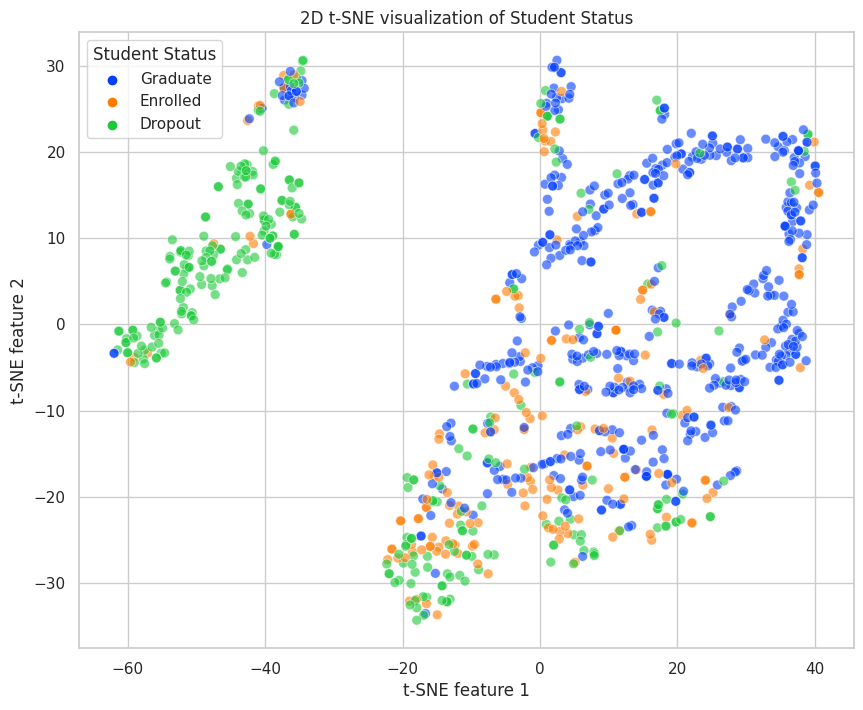

In [35]:
from sklearn.manifold import TSNE
from sklearn.utils import resample

# Subsampling the data
X_sampled, y_sampled = resample(X_train, y_train, n_samples=1000, stratify=y_train, random_state=42)

# Running t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
X_reduced = tsne.fit_transform(X_sampled)

# Predicting with the ensemble model
y_pred = ensemble.predict(X_sampled)

# Replacing numeric labels with string labels
label_names = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
y_sampled_named = y_sampled.map(label_names)  

# Adjusting the color palette to have clearer distinctions
palette = sns.color_palette("bright", len(label_names))

# Modifying the legend mapping for numeric to class names
legend_labels = {v: k for k, v in label_names.items()}

# 2D t-SNE Plot
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_sampled.map(label_names),
                palette=palette, alpha=0.6, s=50)

plt.title('2D t-SNE visualization of Student Status')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Student Status')
plt.show()

## Reflecting on the predictive analysis journey and outcomes
This journey through predictive analysis demonstrates a methodical approach to modeling student statuses, employing a range of techniques from dimensionality reduction to ensemble modeling. However, several different strategies could be considered to potentially enhance our machine learning model's prediction accuracy.

# Rethinking the Target Feature for Predictive Modeling
To potentially enhance our machine learning model's prediction accuracy, we consider simplifying the target variable into two categories: Dropout (1) and No Dropout (0). This binary classification problem focuses on predicting the likelihood of a student dropping out, streamlining the original multi-class objective.
***
## Data Re-Engineering
Adapting the dataset to this analytical shift, we transform the 'Student Status' into a binary feature named 'dropout', merging 'Enrolled' and 'Graduate' statuses into the 'No Dropout' category. This adjustment aims to clarify the prediction goal and potentially improve model performance by focusing on distinguishing between dropouts and continuing students.

In [36]:
# Cloning the original DataFrame to preserve the initial dataset
df_rethinked = df.copy()

# Transforming 'Student Status' into a binary 'dropout' feature
df_rethinked['dropout'] = df_rethinked['Student Status'].map(lambda x: 1 if x == 0 else 0)

# Dropping the original 'Student Status' to avoid confusion
df_rethinked.drop(['Student Status'], axis=1, inplace=True)

# Preparing the dataset for training
X_new = df_rethinked.drop('dropout', axis=1)
y_new = df_rethinked['dropout']

# Splitting the dataset into training and testing sets for the binary classification
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

## Model configurations with hyperparameters
This section outlines configuring machine learning models for the binary classification task, including setting up pipelines for data preprocessing and dimensionality reduction, and tuning hyperparameters through RandomizedSearchCV. The goal is to find the optimal configurations that yield the highest accuracy in predicting dropouts.

Starting search for: Gradient Boosting
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Gradient Boosting: 0.8435
Training Score for Gradient Boosting: 0.8638
Search completed for Gradient Boosting. Time taken: 0:02:35
Best parameters for Gradient Boosting: {'model__learning_rate': 0.047454011884736254, 'model__max_depth': 2, 'model__n_estimators': 114}


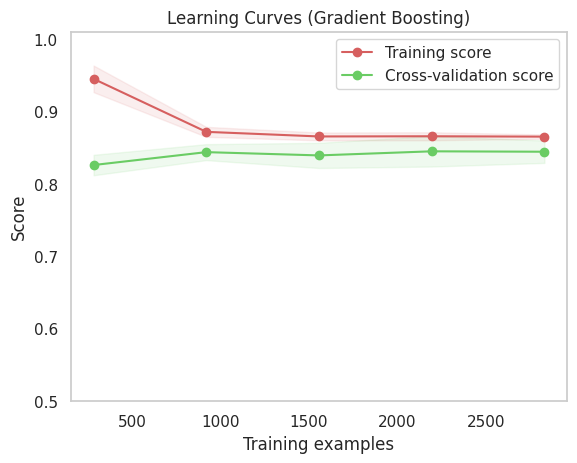

Starting search for: Random Forest
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Random Forest: 0.8426
Training Score for Random Forest: 0.8666
Search completed for Random Forest. Time taken: 0:01:05
Best parameters for Random Forest: {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 3, 'model__n_estimators': 199}


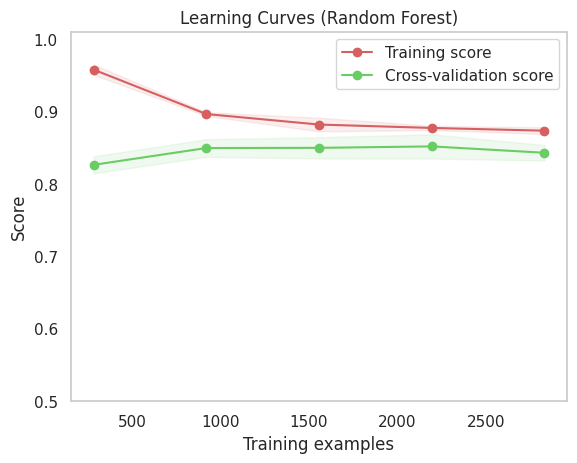

Starting search for: Logistic Regression
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for Logistic Regression: 0.8406
Training Score for Logistic Regression: 0.8446
Search completed for Logistic Regression. Time taken: 0:00:08
Best parameters for Logistic Regression: {'model__C': 0.07058449429580245}


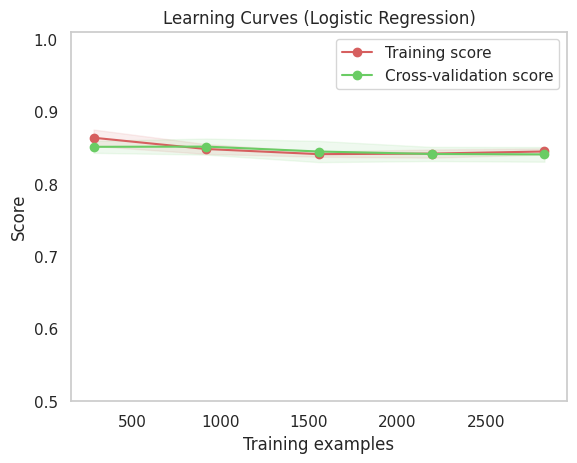

Starting search for: SVM
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for SVM: 0.8446
Training Score for SVM: 0.8805
Search completed for SVM. Time taken: 0:02:15
Best parameters for SVM: {'model__C': 1.749080237694725, 'model__kernel': 'rbf'}


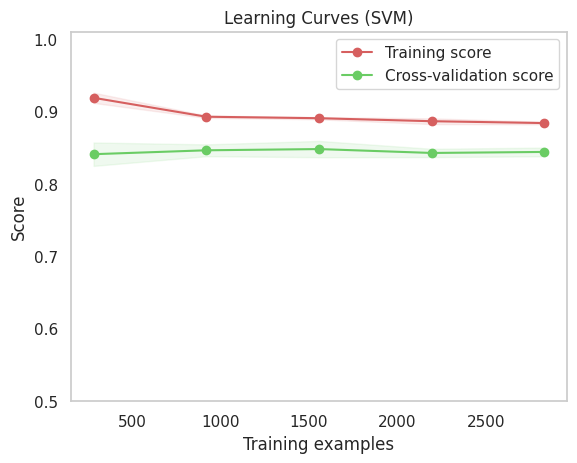

Starting search for: KNN
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Test score for KNN: 0.8265
Training Score for KNN: 0.8550
Search completed for KNN. Time taken: 0:00:10
Best parameters for KNN: {'model__n_neighbors': 24, 'model__weights': 'uniform'}


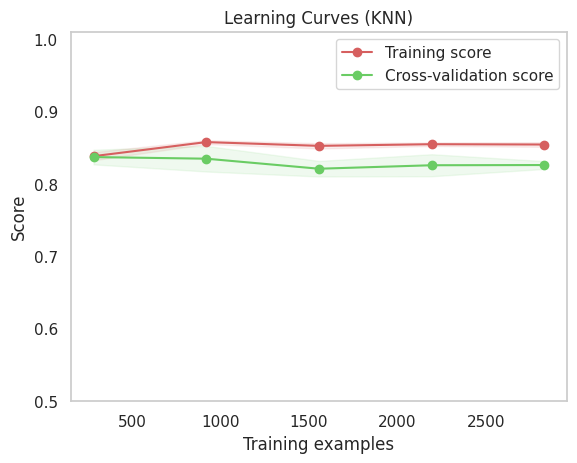

Total time for all model searches: 0:06:52


In [37]:
# Model configurations with hyperparameters
models_config_new = {
    'Gradient Boosting': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', GradientBoostingClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': randint(100, 150),
            'model__learning_rate': uniform(0.01, 0.1),
            'model__max_depth': randint(2, 4)
        }
    },
    'Random Forest': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', RandomForestClassifier(random_state=42))
        ]),
        'params': {
            'model__n_estimators': randint(100, 200),
            'model__max_depth': randint(3, 6),
            'model__min_samples_split': randint(3, 6),
            'model__min_samples_leaf': randint(2, 4)
        }
    },
    'Logistic Regression': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', LogisticRegression(random_state=42))
        ]),
        'params': {
            'model__C': uniform(0.05, 1)
        }
    },
    'SVM': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', SVC(probability=True, random_state=42))
        ]),
        'params': {
            'model__C': uniform(1, 2),
            'model__kernel': ['rbf']
        }
    },
    'KNN': {
        'pipeline': ImbPipeline(steps=[
            ('scaler', StandardScaler()),
            ('smote', SMOTE(random_state=42)),
            ('pca', PCA(n_components=0.95)),
            ('model', KNeighborsClassifier())
        ]),
        'params': {
            'model__n_neighbors': randint(20, 30),
            'model__weights': ['uniform', 'distance']
        }
    }
}

best_models_binary = {}
start_time_new = time.time()

# New RandomizedSearchCV
for name, config in models_config_new.items():
    print(f"Starting search for: {name}")
    search_start_time_new = time.time()
    
    search = RandomizedSearchCV(config['pipeline'], config['params'], n_iter=12, cv=5, scoring='accuracy', random_state=42, verbose=1)
    search.fit(X_train_new, y_train_new)

    best_models_binary[name] = search.best_estimator_
    print(f"Test score for {name}: {search.best_score_:.4f}")
    
    # Comparing training set performance to the best CV score
    training_score = search.score(X_train_new, y_train_new)
    print(f"Training Score for {name}: {training_score:.4f}")
    
    elapsed_time_new = int(time.time() - search_start_time_new)
    print(f"Search completed for {name}. Time taken: {str(timedelta(seconds=elapsed_time_new))}")
    
    # Displaying the best parameters for the current model
    print(f"Best parameters for {name}: {search.best_params_}")
    
    # Plotting the learning curve for the best estimator
    plot_learning_curve(search.best_estimator_, f"Learning Curves ({name})", X_train_new, y_train_new, ylim=(0.5, 1.01), cv=5, n_jobs=4)
    
overall_time_new = int(time.time() - start_time_new)
print(f"Total time for all model searches: {str(timedelta(seconds=overall_time_new))}")

## Ensemble Modeling for Binary Classification
To further enhance prediction accuracy, we aggregate the best-performing models into an ensemble using a VotingClassifier with soft voting. This method combines the predictive strengths of individual models, aiming to improve overall performance and robustness in identifying potential dropouts.

In [38]:
from sklearn.ensemble import VotingClassifier

# Creating an ensemble of the best models
ensemble_binary = VotingClassifier(
    estimators=[(name, model) for name, model in best_models_binary.items()],
    voting='soft'
)
ensemble_binary.fit(X_train_new, y_train_new)

VotingClassifier(estimators=[('Gradient Boosting',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               GradientBoostingClassifier(learning_rate=0.047454011884736254,
                                                                          max_depth=2,
                                                                          n_estimators=114,
                                                                          random_state=42))])),
                             ('Random Forest',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMO...
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               SVC(C=1.749080237694725,
                                                   probability=True,
                                                   random_state=42))])),
                             ('KNN',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('smote', SMOTE(random_state=42)),
                                              ('pca', PCA(n_components=0.95)),
                                              ('model',
                                               KNeighborsClassifier(n_neighbors=24))]))],
                 voting='soft')

## Binary Classification Model Evaluation
We undertake a thorough evaluation of the binary classification model, utilizing accuracy metrics, confusion matrices, classification reports, ROC curves, and precision-recall curves. This comprehensive assessment aims to gauge the model's effectiveness in accurately identifying potential dropouts, offering insights into its strengths and potential areas for improvement.

Ensemble Model Accuracy: 0.8475


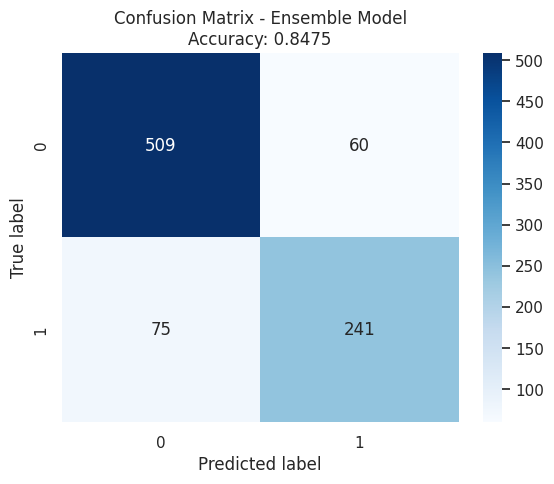

              precision    recall  f1-score   support

     Dropout       0.87      0.89      0.88       569
  No Dropout       0.80      0.76      0.78       316

    accuracy                           0.85       885
   macro avg       0.84      0.83      0.83       885
weighted avg       0.85      0.85      0.85       885



In [39]:
# Predictions
y_pred_binary = ensemble_binary.predict(X_test_new)

# Accuracy
accuracy_binary = accuracy_score(y_test_new, y_pred_binary)
print(f"Ensemble Model Accuracy: {accuracy_binary:.4f}")

# Confusion Matrix
conf_matrix_ensemble_binary = confusion_matrix(y_test_new, y_pred_binary)
sns.heatmap(conf_matrix_ensemble_binary, annot=True, fmt="d", cmap='Blues')
plt.title(f"Confusion Matrix - Ensemble Model\nAccuracy: {accuracy_binary:.4f}")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Classification Report
print(classification_report(y_test_new, y_pred_binary, target_names=['Dropout', 'No Dropout']))

### Advanced Model Performance Visualization
We explore advanced visualization techniques to interpret the model's performance and predictions, including ROC AUC curves and precision-recall curves. These visualizations help in understanding the trade-offs between different evaluation metrics and the model's ability to generalize across the binary classes.

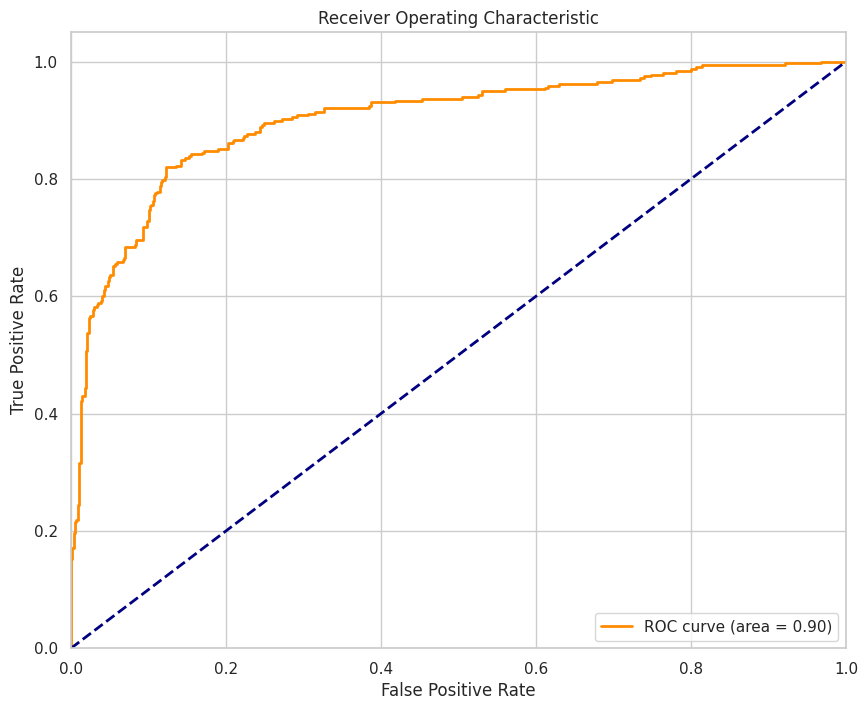

In [40]:
# ROC AUC Curve
y_prob_binary = ensemble_binary.predict_proba(X_test_new)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_new, y_prob_binary)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

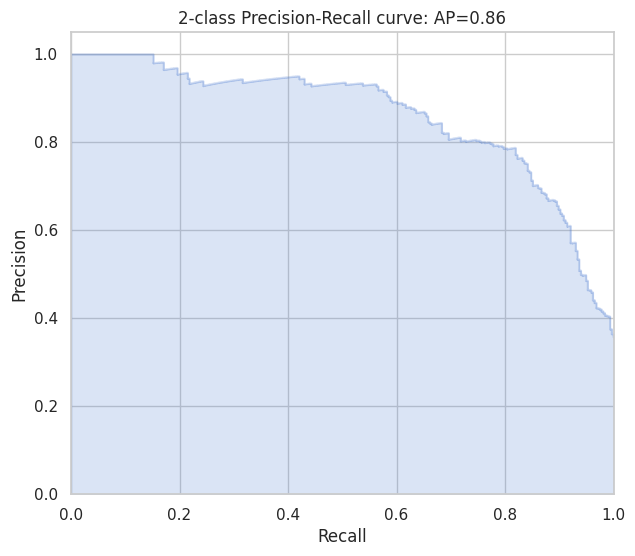

In [41]:
from sklearn.metrics import average_precision_score

# Precision-Recall Curve for binary classification
precision, recall, _ = precision_recall_curve(y_test_new, y_prob_binary)
average_precision = average_precision_score(y_test_new, y_prob_binary)

plt.figure(figsize=(7, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'2-class Precision-Recall curve: AP={average_precision:.2f}')
plt.show()

## 2D t-SNE Visualization for Binary Classification
Employing t-SNE, we visualize the data distribution and model predictions in a reduced dimensional space for the binary classification task. This visualization provides intuitive insights into how well the model distinguishes between the 'Dropout' and 'No Dropout' categories, revealing data patterns and clustering tendencies.

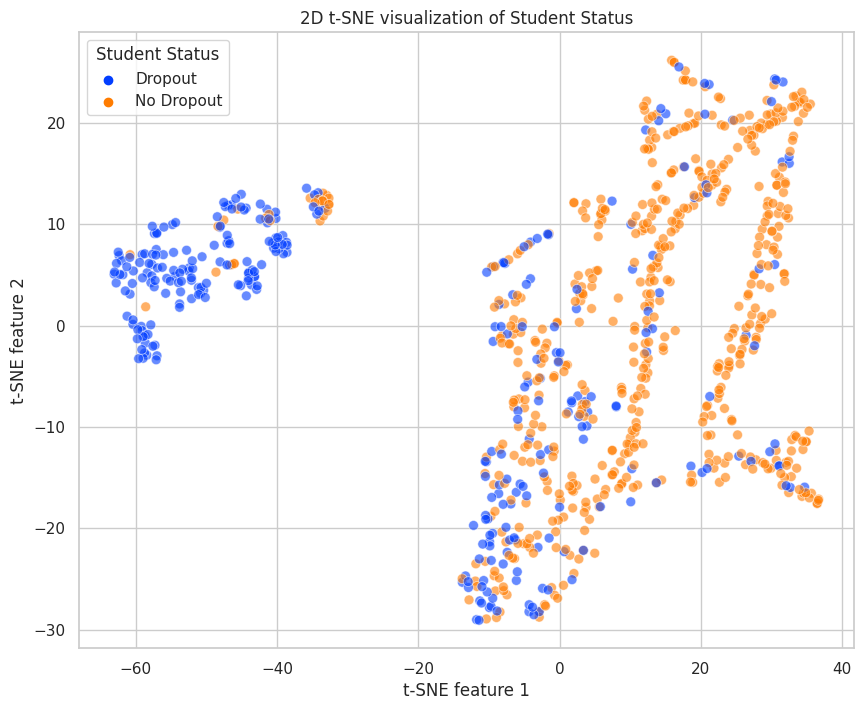

In [42]:
# 2D t-SNE Visualization for binary classification
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X_test_new)

# Replacing numeric labels with string labels
label_names = {0: 'No Dropout', 1: 'Dropout'}
y_test_named = y_test_new.map(label_names)  

# Adjusting the color palette to have clear distinctions
palette = sns.color_palette("bright", len(label_names))

# Modifying the legend mapping for numeric to class names
legend_labels = {v: k for k, v in label_names.items()}

# 2D t-SNE Plot
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=y_test_named, palette=palette, alpha=0.6, s=50)
plt.title('2D t-SNE visualization of Student Status')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.legend(title='Student Status', loc='best')
plt.show()

## Model Performance Comparison
We compare the performance of the original multi-class model against the redefined binary classification model. This comparison is visualized through accuracy scores, illustrating the impact of simplifying the target feature on model effectiveness and prediction accuracy.

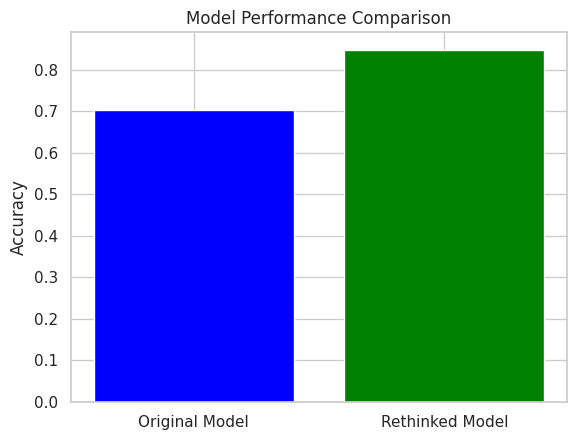

In [43]:
# Visualization setup
labels = ['Original Model', 'Rethinked Model']
accuracy_scores = [accuracy, accuracy_binary]

# Creating the plot
plt.bar(labels, accuracy_scores, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.show()

This revised approach, focusing on binary classification, aims to streamline the predictive modeling process, potentially offering more accurate and actionable insights for identifying students at risk of dropping out.

# How to Implement this Solutions: MLOps on AWS
For deploying and managing this predictive analysis model, AWS provides a comprehensive cloud environment. The MLOps Workload Orchestrator facilitates best practices in architecture and offers an extendable framework for EduML pipelines, leveraging AWS services and third-party tools to streamline the deployment and operationalization of machine learning models in the public sector.
***

*draw.io Diagram*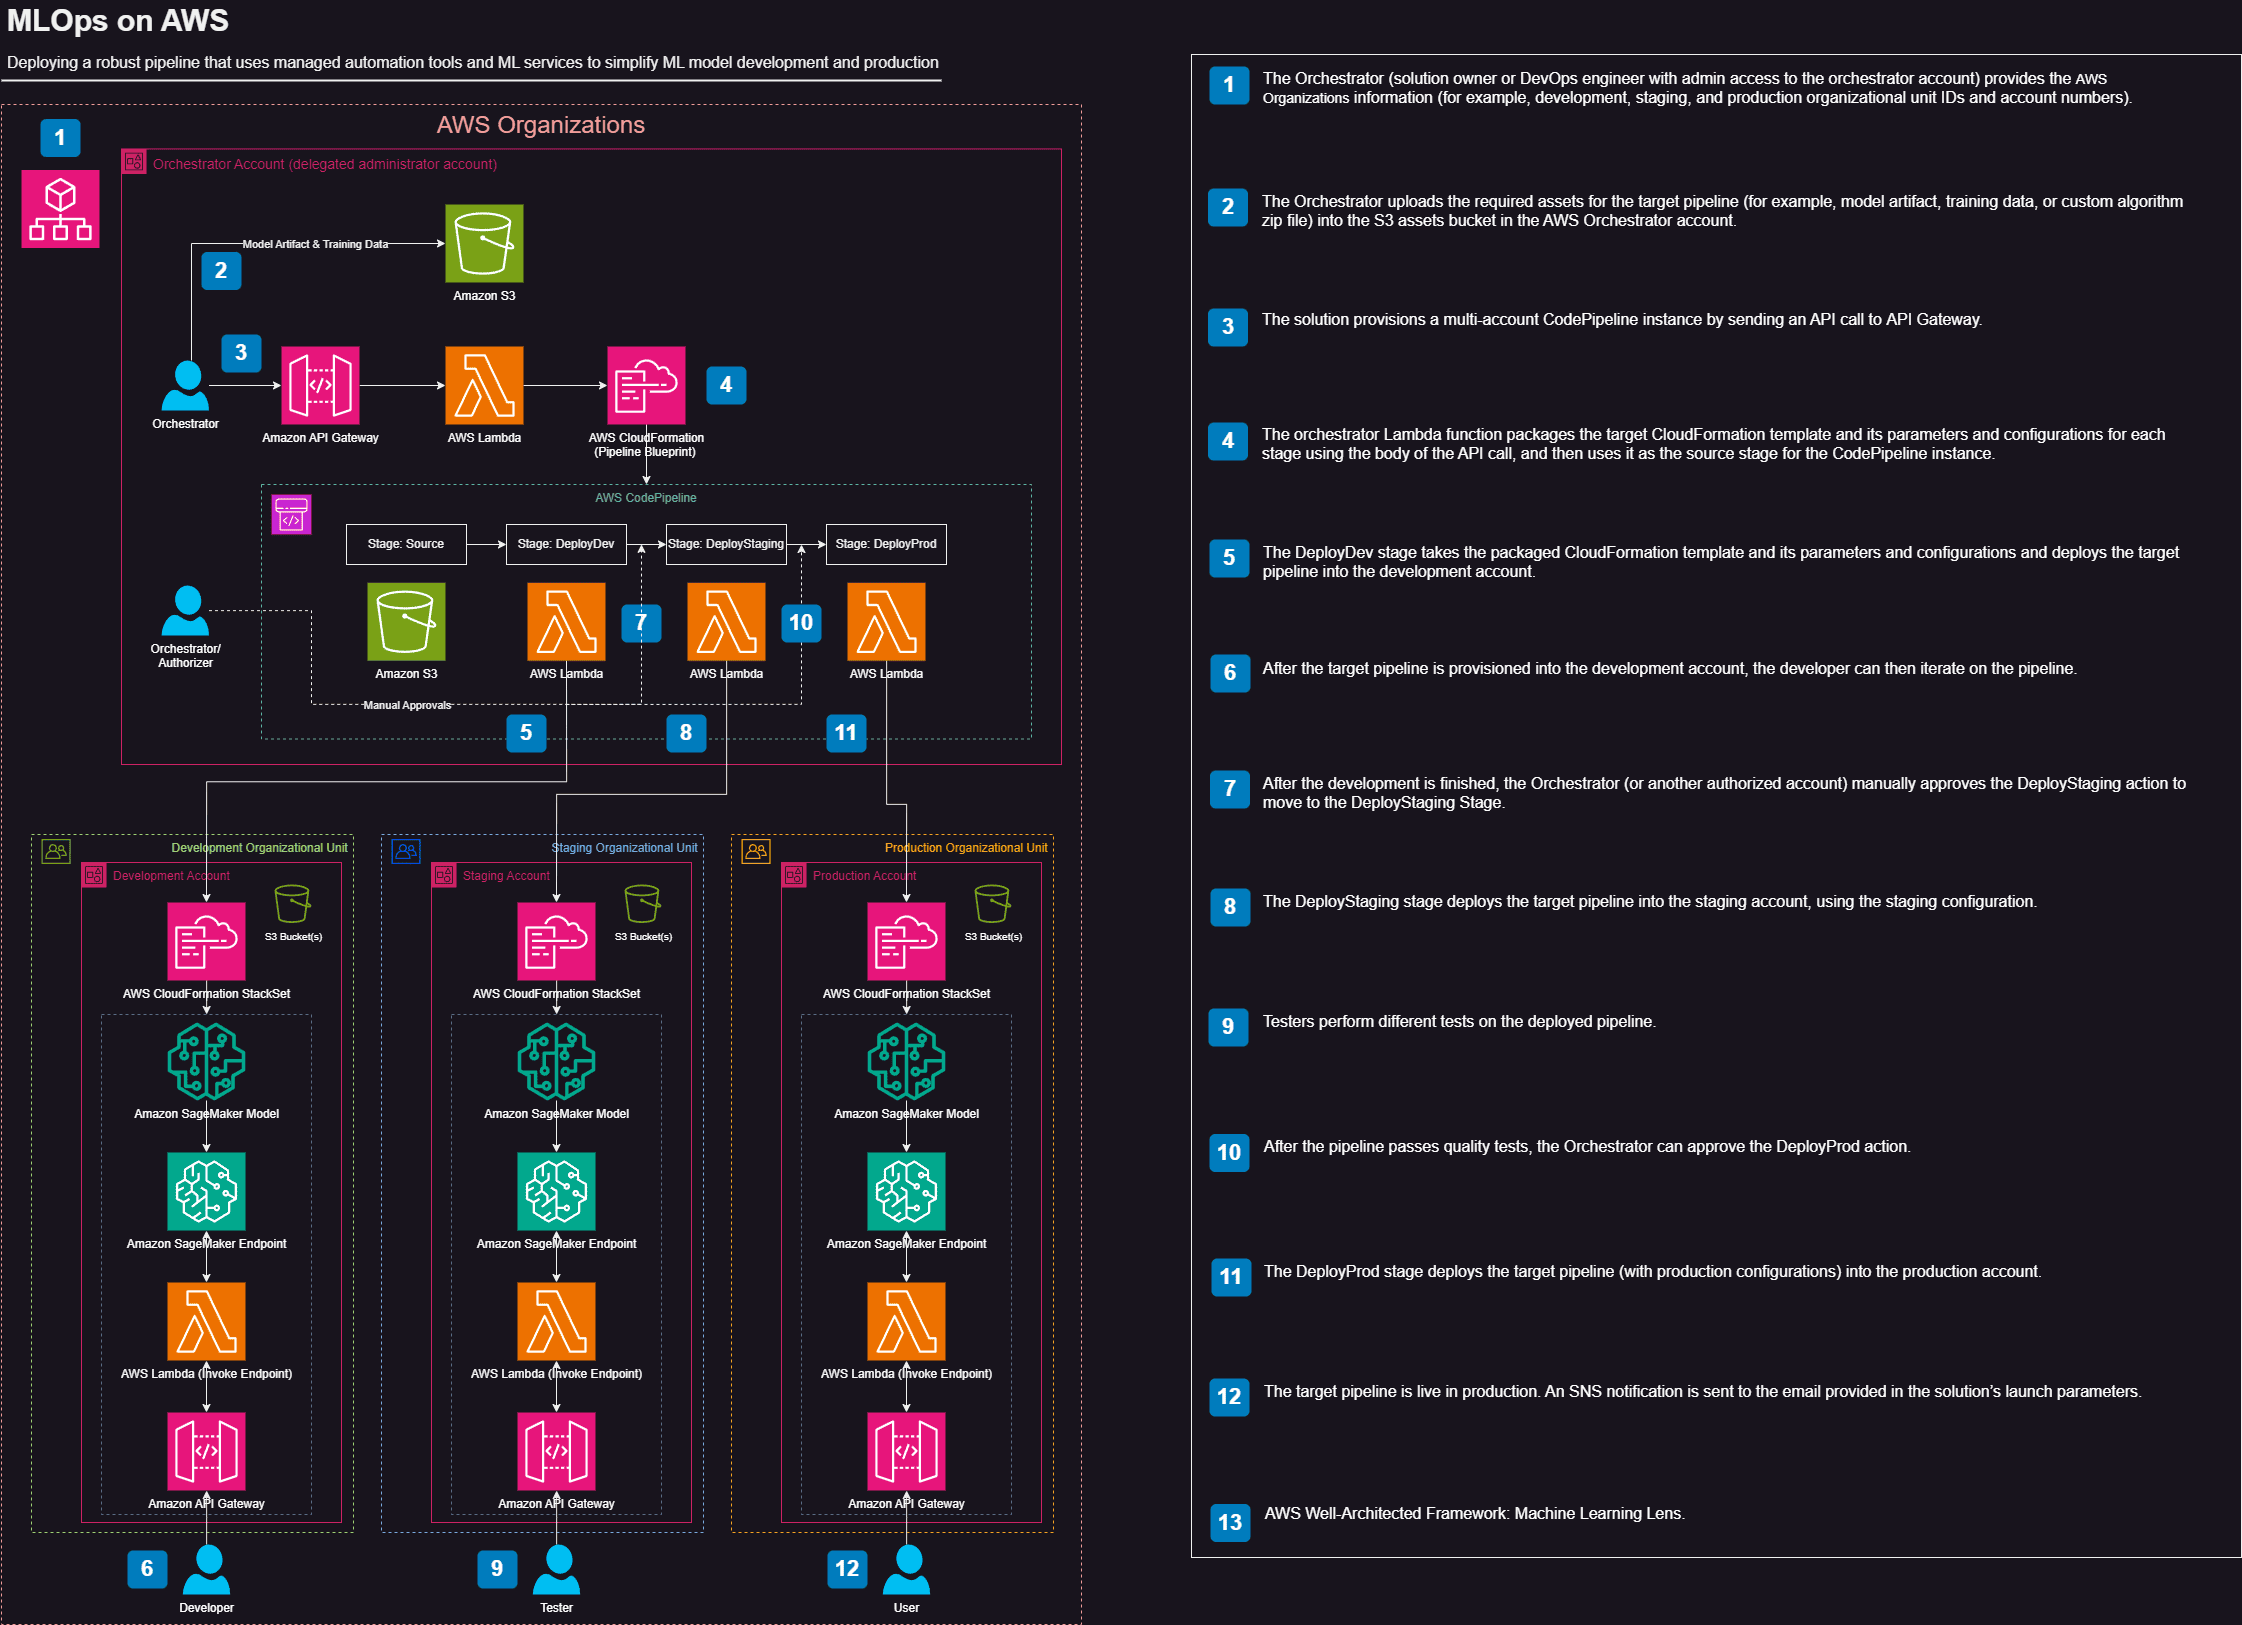

## MLOps Workload Orchestrator Multi-Account Template
This JSON configuration code serves as a template for a CloudFormation stack designed to orchestrate MLOps workloads across multiple AWS accounts. Detailed comments have been incorporated throughout the template to clarify its functionalities. This setup is particularly beneficial for educational institutions and researchers looking to customize the solution according to their specific needs.

{

    "Description": "(SO0136-ma) - MLOps Workload Orchestrator (Multi Account Option). Version v2.2.0",
    # Description of the CloudFormation template specifying its purpose and version details.

    "Metadata": {
        "AWS::CloudFormation::Interface": {
            "ParameterGroups": [
                {
                    "Label": {
                        "default": "MLOps Framework Settings"
                    },
                    # Label for organizing parameters under 'MLOps Framework Settings' for better clarity in the AWS console.

                    "Parameters": [
                        "NotificationEmail",
                        "CodeCommitRepoAddress",
                        "ExistingS3Bucket",
                        "ExistingECRRepo",
                        "UseModelRegistry",
                        "CreateModelRegistry",
                        "AllowDetailedErrorMessage",
                        "DelegatedAdminAccount",
                        "DevAccountId",
                        "DevOrgId",
                        "StagingAccountId",
                        "StagingOrgId",
                        "ProdAccountId",
                        "ProdOrgId"
                    ]
                    # List of parameters for the CloudFormation template, affecting various settings like email notifications, repository addresses, etc.
                }
            ],
            "ParameterLabels": {
                "NotificationEmail": {
                    "default": "Notification Email (Required)"
                },
                "CodeCommitRepoAddress": {
                    "default": "CodeCommit Repo URL Address (Optional)"
                },
                "ExistingS3Bucket": {
                    "default": "Name of an Existing S3 Bucket (Optional)"
                },
                "ExistingECRRepo": {
                    "default": "Name of an Existing Amazon ECR repository (Optional)"
                },
                "UseModelRegistry": {
                    "default": "Do you want to use SageMaker Model Registry?"
                },
                "CreateModelRegistry": {
                    "default": "Do you want the solution to create a SageMaker's model package group?"
                },
                "AllowDetailedErrorMessage": {
                    "default": "Do you want to allow detailed error messages in the APIs response?"
                },
                "DelegatedAdminAccount": {
                    "default": "Are you using a delegated administrator account (AWS Organizations)?"
                },
                "DevAccountId": {
                    "default": "Development Account ID (Required)"
                },
                "DevOrgId": {
                    "default": "Development Account Organizational Unit ID (Required)"
                },
                "StagingAccountId": {
                    "default": "Staging Account ID (Required)"
                },
                "StagingOrgId": {
                    "default": "Staging Account Organizational Unit ID (Required)"
                },
                "ProdAccountId": {
                    "default": "Production Account ID (Required)"
                },
                "ProdOrgId": {
                    "default": "Production Account Organizational Unit ID (Required)"
                }
            }
        }
    },
    "Parameters": {
        "NotificationEmail": {
            "Type": "String",
            "AllowedPattern": "^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\\.[a-zA-Z0-9-.]+$",
            "ConstraintDescription": "Please enter an email address with correct format (example@example.com)",
            "Description": "email for pipeline outcome notifications",
            "MaxLength": 320,
            "MinLength": 5
        },
        # Parameter for specifying the notification email address; includes validation for email format.

        "CodeCommitRepoAddress": {
            "Type": "String",
            "AllowedPattern": "^(((https:\\/\\/|ssh:\\/\\/)(git\\-codecommit)\\.[a-zA-Z0-9_.+-]+(amazonaws\\.com\\/)[a-zA-Z0-9-.]+(\\/)[a-zA-Z0-9-.]+(\\/)[a-zA-Z0-9-.]+$)|^$)",
            "ConstraintDescription": "CodeCommit address must follow the pattern: ssh or https://git-codecommit.REGION.amazonaws.com/version/repos/REPONAME",
            "Description": "AWS CodeCommit repository clone URL to connect to the framework.",
            "MaxLength": 320,
            "MinLength": 0
        },
        # Parameter for the AWS CodeCommit repository URL, with validation to ensure it follows the specified URL format.

        "ExistingS3Bucket": {
            "Type": "String",
            "AllowedPattern": "((?=^.{3,63}$)(?!^(\\d+\\.)+\\d+$)(^(([a-z0-9]|[a-z0-9][a-z0-9\\-]*[a-z0-9])\\.)*([a-z0-9]|[a-z0-9][a-z0-9\\-]*[a-z0-9])$)|^$)",
            "Description": "Name of existing S3 bucket to be used for ML assets. S3 Bucket must be in the same region as the deployed stack, and has versioning enabled. If not provided, a new S3 bucket will be created.",
            "MaxLength": 63,
            "MinLength": 0
        },
        # Parameter for specifying an existing Amazon S3 bucket, includes pattern validation for bucket names.

        "ExistingECRRepo": {
            "Type": "String",
            "AllowedPattern": "((?:[a-z0-9]+(?:[._-][a-z0-9]+)*/)*[a-z0-9]+(?:[._-][a-z0-9]+)*|^$)",
            "Description": "Name of existing Amazon ECR repository for custom algorithms. If not provided, a new ECR repo will be created.",
            "MaxLength": 63,
            "MinLength": 0
        },
        # Parameter for specifying an existing Amazon ECR repository, with pattern validation for repository names.

        "UseModelRegistry": {
            "Type": "String",
            "Default": "No",
            "AllowedValues": [
                "Yes",
                "No"
            ],
            "Description": "Will Amazon SageMaker's Model Registry be used to provision models?"
        },
        # Boolean parameter to specify whether to use Amazon SageMaker's Model Registry.

        "CreateModelRegistry": {
            "Type": "String",
            "Default": "No",
            "AllowedValues": [
                "Yes",
                "No"
            ],
            "Description": "Do you want the solution to create the SageMaker Model Package Group Name (i.e., Model Registry)"
        },
        # Boolean parameter to specify whether to create a new Model Registry in SageMaker.

        "AllowDetailedErrorMessage": {
            "Type": "String",
            "Default": "Yes",
            "AllowedValues": [
                "Yes",
                "No"
            ],
            "Description": "Allow including a detailed message of any server-side errors in the API call's response"
        },
        # Boolean parameter to allow detailed error messages to be included in API responses for better troubleshooting.

        "DelegatedAdminAccount": {
            "Type": "String",
            "Default": "Yes",
            "AllowedValues": [
                "Yes",
                "No"
            ],
            "Description": "Is a delegated administrator account used to deploy across account"
        },
        # Boolean parameter to specify whether a delegated administrator account is used for the deployment.

        "DevAccountId": {
            "Type": "String",
            "AllowedPattern": "^\\d{12}$",
            "Description": "AWS development account number where the CF template will be deployed"
        },
        # Parameter for specifying the AWS development account number, must be exactly 12 digits.

        "DevOrgId": {
            "Type": "String",
            "AllowedPattern": "^ou-[0-9a-z]{4,32}-[a-z0-9]{8,32}$",
            "Description": "AWS development organizational unit id where the CF template will be deployed"
        },
        # Parameter for specifying the AWS Organizational Unit ID for the development environment, with validation for the ID format.

        "StagingAccountId": {
            "Type": "String",
            "AllowedPattern": "^\\d{12}$",
            "Description": "AWS staging account number where the CF template will be deployed"
        },
        # Parameter for specifying the AWS staging account number, similar to the development account parameter.

        "StagingOrgId": {
            "Type": "String",
            "AllowedPattern": "^ou-[0-9a-z]{4,32}-[a-z0-9]{8,32}$",
            "Description": "AWS staging organizational unit id where the CF template will be deployed"
        },
        # Parameter for specifying the AWS Organizational Unit ID for the staging environment, ensuring it meets AWS's ID format.

        "ProdAccountId": {
            "Type": "String",
            "AllowedPattern": "^\\d{12}$",
            "Description": "AWS production account number where the CF template will be deployed"
        },
        # Parameter for specifying the AWS production account number, follows the same format as development and staging account parameters.

        "ProdOrgId": {
            "Type": "String",
            "AllowedPattern": "^ou-[0-9a-z]{4,32}-[a-z0-9]{8,32}$",
            "Description": "AWS production organizational unit id where the CF template will be deployed"
        }
        # Parameter for specifying the AWS Organizational Unit ID for the production environment, with format validation.
    },
    "Conditions": {
        "GitAddressProvided": {
            "Fn::Not": [
                {
                    "Fn::Equals": [
                        {
                            "Ref": "CodeCommitRepoAddress"
                        },
                        ""
                    ]
                }
            ]
        },
        # Condition to check if a Git address for CodeCommit is provided.

        "S3BucketProvided": {
            "Fn::Not": [
                {
                    "Fn::Equals": [
                        {
                            "Ref": "ExistingS3Bucket"
                        },
                        ""
                    ]
                }
            ]
        },
        # Condition to check if an existing S3 bucket name is provided.

        "ECRProvided": {
            "Fn::Not": [
                {
                    "Fn::Equals": [
                        {
                            "Ref": "ExistingECRRepo"
                        },
                        ""
                    ]
                }
            ]
        },
        # Condition to check if an existing ECR repository name is provided.

        "CreateModelRegistryCondition": {
            "Fn::Equals": [
                {
                    "Ref": "CreateModelRegistry"
                },
                "Yes"
            ]
        },
        # Condition to determine whether to create a new SageMaker Model Registry.

        "CreateS3Bucket": {
            "Fn::Equals": [
                {
                    "Ref": "ExistingS3Bucket"
                },
                ""
            ]
        },
        # Condition to determine whether to create a new S3 bucket if one is not provided.

        "CreateECRRepo": {
            "Fn::Equals": [
                {
                    "Ref": "ExistingECRRepo"
                },
                ""
            ]
        },
        # Condition to determine whether to create a new ECR repository if one is not provided.

        "AnonymizedDatatoAWS": {
            "Fn::Equals": [
                {
                    "Fn::FindInMap": [
                        "AnonymizedData",
                        "SendAnonymizedData",
                        "Data"
                    ]
                },
                "Yes"
            ]
        }
        # Condition to enable sending anonymized data for AWS Solutions constructs.
    },
    "Resources": {
        "accessLogs751B1465": {
            "Type": "AWS::S3::Bucket",
            "Properties": {
                "BucketEncryption": {
                    "ServerSideEncryptionConfiguration": [
                        {
                            "ServerSideEncryptionByDefault": {
                                "SSEAlgorithm": "AES256"
                            }
                        }
                    ]
                },
                # S3 bucket for access logs with server-side AES-256 encryption enabled.

                "OwnershipControls": {
                    "Rules": [
                        {
                            "ObjectOwnership": "ObjectWriter"
                        }
                    ]
                },
                # Set object ownership to 'ObjectWriter' which enables the uploading AWS account to own the object.

                "PublicAccessBlockConfiguration": {
                    "BlockPublicAcls": true,
                    "BlockPublicPolicy": true,
                    "IgnorePublicAcls": true,
                    "RestrictPublicBuckets": true
                },
                # Configuration to block public access to this S3 bucket completely.

                "VersioningConfiguration": {
                    "Status": "Enabled"
                }
                # Enable versioning to keep multiple versions of an object in the same bucket.
            },
            "UpdateReplacePolicy": "Retain",
            "DeletionPolicy": "Retain",
            # Both policies set to 'Retain' to prevent the bucket from being deleted when the stack is updated or deleted.

            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W35",
                            "reason": "This is the access bucket"
                        }
                    ]
                }
            }
            # Metadata to suppress specific warnings from cfn_nag tool.
        },
        "accessLogsPolicy8C9988FF": {
            "Type": "AWS::S3::BucketPolicy",
            "Properties": {
                "Bucket": {
                    "Ref": "accessLogs751B1465"
                },
                # Reference to the 'accessLogs751B1465' bucket to apply this policy.

                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": "s3:*",
                            "Condition": {
                                "Bool": {
                                    "aws:SecureTransport": "false"
                                }
                            },
                            # Condition that denies all actions if the data transfer is not done over HTTPS.

                            "Effect": "Deny",
                            "Principal": {
                                "AWS": "*"
                            },
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "accessLogs751B1465",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "accessLogs751B1465",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # Specifies the resources under this policy (all objects within the bucket).
                        },
                        {
                            "Action": "s3:PutObject",
                            "Condition": {
                                "ArnLike": {
                                    "aws:SourceArn": [
                                        {
                                            "Fn::Join": [
                                                "",
                                                [
                                                    "arn:",
                                                    {
                                                        "Ref": "AWS::Partition"
                                                    },
                                                    ":s3:::",
                                                    {
                                                        "Fn::If": [
                                                            "S3BucketProvided",
                                                            {
                                                                "Ref": "ExistingS3Bucket"
                                                            },
                                                            {
                                                                "Ref": "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970"
                                                            }
                                                        ]
                                                    }
                                                ]
                                            ]
                                        },
                                        {
                                            "Fn::GetAtt": [
                                                "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                                "Arn"
                                            ]
                                        }
                                    ]
                                },
                                "StringEquals": {
                                    "aws:SourceAccount": {
                                        "Ref": "AWS::AccountId"
                                    }
                                }
                            },
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "logging.s3.amazonaws.com"
                            },
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        {
                                            "Fn::GetAtt": [
                                                "accessLogs751B1465",
                                                "Arn"
                                            ]
                                        },
                                        "/*"
                                    ]
                                ]
                            }
                            # Allow the S3 logging service to put log objects into the bucket.
                        }
                    ],
                    "Version": "2012-10-17"
                }
            }
        },
        "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970": {
            "Type": "AWS::S3::Bucket",
            "Properties": {
                "BucketEncryption": {
                    "ServerSideEncryptionConfiguration": [
                        {
                            "ServerSideEncryptionByDefault": {
                                "SSEAlgorithm": "AES256"
                            }
                        }
                    ]
                },
                # Bucket for pipeline assets with AES-256 server-side encryption enabled.

                "LoggingConfiguration": {
                    "DestinationBucketName": {
                        "Ref": "accessLogs751B1465"
                    },
                    "LogFilePrefix": "assets_bucket_access_logs"
                },
                # Configuring logging for the bucket, sending logs to 'accessLogs751B1465' with a specific prefix.

                "PublicAccessBlockConfiguration": {
                    "BlockPublicAcls": true,
                    "BlockPublicPolicy": true,
                    "IgnorePublicAcls": true,
                    "RestrictPublicBuckets": true
                },
                # Blocking public access configurations similar to the logs bucket.

                "VersioningConfiguration": {
                    "Status": "Enabled"
                }
                # Enable versioning for this bucket as well.
            },
            "UpdateReplacePolicy": "Retain",
            "DeletionPolicy": "Retain",
            # Retain policy for updates and deletions to avoid data loss.

            "Condition": "CreateS3Bucket"
            # This resource creation is conditional on whether a new S3 bucket needs to be created.
        },
        "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aPolicy29496F21": {
            "Type": "AWS::S3::BucketPolicy",
            "Properties": {
                "Bucket": {
                    "Ref": "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970"
                },
                # Apply this bucket policy to the 'pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970' bucket.

                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": "s3:*",
                            "Condition": {
                                "Bool": {
                                    "aws:SecureTransport": "false"
                                }
                            },
                            # Deny all actions if the data is not transferred over HTTPS.

                            "Effect": "Deny",
                            "Principal": {
                                "AWS": "*"
                            },
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # Specifies the resources under this policy (all objects within the bucket).
                        },
                        {
                            "Action": [
                                "s3:GetObject",
                                "s3:ListBucket"
                            ],
                            "Effect": "Allow",
                            "Principal": {
                                "AWS": [
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "DevAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    },
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "StagingAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    },
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "ProdAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    }
                                ]
                            },
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow 'GetObject' and 'ListBucket' actions for the development, staging, and production account roots.
                        }
                    ],
                    "Version": "2012-10-17"
                }
                # Specify the version of the policy language.
            },
            "Condition": "CreateS3Bucket"
            # This policy is only applied if the S3 bucket is being created as part of this deployment.
        },
        "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B": {
            "Type": "AWS::S3::Bucket",
            "Properties": {
                "BucketEncryption": {
                    "ServerSideEncryptionConfiguration": [
                        {
                            "ServerSideEncryptionByDefault": {
                                "SSEAlgorithm": "AES256"
                            }
                        }
                    ]
                },
                # Another S3 bucket specifically for storing blueprints with AES-256 encryption.

                "LoggingConfiguration": {
                    "DestinationBucketName": {
                        "Ref": "accessLogs751B1465"
                    },
                    "LogFilePrefix": "blueprint-repository-82b0e7df-f011-4926-bafb-e05f364ad35f"
                },
                # Logging configuration for the blueprint repository bucket.

                "PublicAccessBlockConfiguration": {
                    "BlockPublicAcls": true,
                    "BlockPublicPolicy": true,
                    "IgnorePublicAcls": true,
                    "RestrictPublicBuckets": true
                },
                # Public access is completely blocked for this bucket as well.

                "VersioningConfiguration": {
                    "Status": "Enabled"
                }
                # Versioning is enabled to preserve previous versions of objects.
            },
            "UpdateReplacePolicy": "Retain",
            "DeletionPolicy": "Retain"
            # Retain policies to prevent loss of data.
        },
        "blueprintrepository82b0e7dff0114926bafbe05f364ad35fPolicyAF5F39A5": {
            "Type": "AWS::S3::BucketPolicy",
            "Properties": {
                "Bucket": {
                    "Ref": "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B"
                },
                # Applying this policy to the blueprint repository bucket.

                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": "s3:*",
                            "Condition": {
                                "Bool": {
                                    "aws:SecureTransport": "false"
                                }
                            },
                            # Deny all actions if the transport is not secured (HTTPS).

                            "Effect": "Deny",
                            "Principal": {
                                "AWS": "*"
                            },
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # This policy applies to all objects within the bucket.
                        },
                        {
                            "Action": [
                                "s3:GetObject",
                                "s3:ListBucket"
                            ],
                            "Effect": "Allow",
                            "Principal": {
                                "AWS": [
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "DevAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    },
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "StagingAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    },
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "ProdAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    }
                                ]
                            },
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow 'GetObject' and 'ListBucket' actions for the development, staging, and production account roots.
                        }
                    ],
                    "Version": "2012-10-17"
                }
            }
        },
        "ECRRepoC36DC9E6": {
            "Type": "AWS::ECR::Repository",
            "Properties": {
                "ImageScanningConfiguration": {
                    "ScanOnPush": true
                },
                # Enable scanning of Docker images when they are pushed to the repository for vulnerabilities.

                "RepositoryPolicyText": {
                    "Statement": [
                        {
                            "Action": [
                                "ecr:DescribeImages",
                                "ecr:DescribeRepositories",
                                "ecr:GetDownloadUrlForLayer",
                                "ecr:BatchGetImage",
                                "ecr:BatchCheckLayerAvailability"
                            ],
                            "Effect": "Allow",
                            "Principal": {
                                "AWS": [
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "DevAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    },
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "StagingAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    },
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "ProdAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    }
                                ]
                            }
                            # Allowing specific ECR actions for the development, staging, and production accounts.
                        }
                    ],
                    "Version": "2012-10-17"
                }
            },
            "UpdateReplacePolicy": "Retain",
            "DeletionPolicy": "Retain",
            # Policies to retain the ECR repository on updates and deletions.

            "Condition": "CreateECRRepo"
            # This resource is conditionally created if an ECR repo is not already provided.
        },
        "MLOpsNotificationsTopic6E63EA9B": {
            "Type": "AWS::SNS::Topic",
            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W47",
                            "reason": "This SNS topic does not contain any sensitive information."
                        }
                    ]
                }
            }
            # Metadata to suppress a specific warning for this SNS topic as it does not contain sensitive information.
        },
        "MLOpsNotificationsTopicTokenSubscription144FE5F73": {
            "Type": "AWS::SNS::Subscription",
            "Properties": {
                "Protocol": "email",
                "TopicArn": {
                    "Ref": "MLOpsNotificationsTopic6E63EA9B"
                },
                "Endpoint": {
                    "Ref": "NotificationEmail"
                }
            }
            # SNS subscription to send notifications to the provided email address.
        },
        "MLOpsNotificationsTopicPolicy2A28E2A5": {
            "Type": "AWS::SNS::TopicPolicy",
            "Properties": {
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sns:Publish",
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "events.amazonaws.com"
                            },
                            "Resource": {
                                "Ref": "MLOpsNotificationsTopic6E63EA9B"
                            },
                            "Sid": "0"
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "Topics": [
                    {
                        "Ref": "MLOpsNotificationsTopic6E63EA9B"
                    }
                ]
            }
            # Policy to allow AWS Events to publish to this SNS topic.
        },
        "SolutionHelperServiceRoleB95702BC": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "lambda.amazonaws.com"
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "ManagedPolicyArns": [
                    {
                        "Fn::Join": [
                            "",
                            [
                                "arn:",
                                {
                                    "Ref": "AWS::Partition"
                                },
                                ":iam::aws:policy/service-role/AWSLambdaBasicExecutionRole"
                            ]
                        ]
                    }
                ]
            }
            # IAM role for a Lambda function, allowing it to assume a role and granting basic execution permissions.
        },
        "SolutionHelperC369AAA8": {
            "Type": "AWS::Lambda::Function",
            "Properties": {
                "Code": {
                    "S3Bucket": {
                        "Fn::Sub": "solutions-${AWS::Region}"
                    },
                    "S3Key": "mlops-workload-orchestrator/v2.2.0/asset4a67e5c6bb3ebcf9a75d246eca85ad318d5f7aa69bcc15a5e1fa5fd1020ef4b3.zip"
                },
                # Lambda function configuration, specifying the S3 bucket and object key for the code source.

                "Role": {
                    "Fn::GetAtt": [
                        "SolutionHelperServiceRoleB95702BC",
                        "Arn"
                    ]
                },
                # Reference to the IAM role created earlier for this Lambda function.

                "Environment": {
                    "Variables": {
                        "AWS_SDK_USER_AGENT": "{\"user_agent_extra\": \"AwsSolution/SO0136/v2.2.0\"}",
                        "PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION": "python"
                    }
                },
                # Environment variables for the Lambda function, including a custom user agent for AWS SDK calls.

                "Handler": "lambda_function.handler",
                "Runtime": "python3.10",
                "Timeout": 300
                # Configuration details for the Lambda function such as the handler, runtime, and timeout settings.
            },
            "DependsOn": [
                "SolutionHelperServiceRoleB95702BC"
            ],
            # This Lambda function depends on the 'SolutionHelperServiceRoleB95702BC' IAM role being created first.

            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W89",
                            "reason": "The lambda function does not need to be attached to a vpc."
                        },
                        {
                            "id": "W58",
                            "reason": "The lambda functions role already has permissions to write cloudwatch logs"
                        },
                        {
                            "id": "W92",
                            "reason": "The lambda function does need to define ReservedConcurrentExecutions"
                        }
                    ]
                }
            }
            # Metadata to suppress specific warnings from the cfn_nag tool.
        },
        "CreateUniqueID": {
            "Type": "Custom::CreateUUID",
            "Properties": {
                "ServiceToken": {
                    "Fn::GetAtt": [
                        "SolutionHelperC369AAA8",
                        "Arn"
                    ]
                },
                "Resource": "UUID",
                "CreateModelRegistry": {
                    "Ref": "CreateModelRegistry"
                }
            },
            "UpdateReplacePolicy": "Delete",
            "DeletionPolicy": "Delete"
            # Custom resource to create a unique UUID, with policies set to delete the resource when the stack is updated or deleted.
        },
        "SageMakerModelRegistry": {
            "Type": "AWS::SageMaker::ModelPackageGroup",
            "Properties": {
                "ModelPackageGroupName": {
                    "Fn::Join": [
                        "",
                        [
                            "mlops-model-registry-",
                            {
                                "Fn::Select": [
                                    0,
                                    {
                                        "Fn::Split": [
                                            "-",
                                            {
                                                "Fn::GetAtt": [
                                                    "CreateUniqueID",
                                                    "UUID"
                                                ]
                                            }
                                        ]
                                    }
                                ]
                            }
                        ]
                    ]
                },
                # SageMaker Model Package Group name, dynamically generated using a UUID.

                "ModelPackageGroupDescription": "SageMaker model package group name (model registry) for mlops",
                "ModelPackageGroupPolicy": {
                    "Version": "2012-10-17",
                    "Statement": [
                        {
                            "Sid": "AddPermModelPackageGroup",
                            "Effect": "Allow",
                            "Principal": {
                                "AWS": [
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "DevAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    },
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "StagingAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    },
                                    {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":iam::",
                                                {
                                                    "Ref": "ProdAccountId"
                                                },
                                                ":root"
                                            ]
                                        ]
                                    }
                                ]
                            },
                            "Action": [
                                "sagemaker:DescribeModelPackageGroup",
                                "sagemaker:DescribeModelPackage",
                                "sagemaker:ListModelPackages",
                                "sagemaker:UpdateModelPackage",
                                "sagemaker:CreateModel"
                            ],
                            "Resource": [
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::Sub": [
                                                    "arn:${PARTITION}:sagemaker:${REGION}:${ACCOUNT_ID}",
                                                    {
                                                        "PARTITION": {
                                                            "Ref": "AWS::Partition"
                                                        },
                                                        "REGION": {
                                                            "Ref": "AWS::Region"
                                                        },
                                                        "ACCOUNT_ID": {
                                                            "Ref": "AWS::AccountId"
                                                        }
                                                    }
                                                ]
                                            },
                                            ":model-package-group/mlops-model-registry-",
                                            {
                                                "Fn::Select": [
                                                    0,
                                                    {
                                                        "Fn::Split": [
                                                            "-",
                                                            {
                                                                "Fn::GetAtt": [
                                                                    "CreateUniqueID",
                                                                    "UUID"
                                                                ]
                                                            }
                                                        ]
                                                    }
                                                ]
                                            }
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::Sub": [
                                                    "arn:${PARTITION}:sagemaker:${REGION}:${ACCOUNT_ID}",
                                                    {
                                                        "PARTITION": {
                                                            "Ref": "AWS::Partition"
                                                        },
                                                        "REGION": {
                                                            "Ref": "AWS::Region"
                                                        },
                                                        "ACCOUNT_ID": {
                                                            "Ref": "AWS::AccountId"
                                                        }
                                                    }
                                                ]
                                            },
                                            ":model-package/mlops-model-registry-",
                                            {
                                                "Fn::Select": [
                                                    0,
                                                    {
                                                        "Fn::Split": [
                                                            "-",
                                                            {
                                                                "Fn::GetAtt": [
                                                                    "CreateUniqueID",
                                                                    "UUID"
                                                                ]
                                                            }
                                                        ]
                                                    }
                                                ],
                                                "/*"
                                            }
                                        ]
                                    ]
                                }
                            ]
                            # Permissions to allow the specified accounts to manage SageMaker model packages under this group.
                        }
                    ]
                },
                "Tags": [
                    {
                        "Key": "stack-name",
                        "Value": {
                            "Ref": "AWS::StackName"
                        }
                    }
                ]
            },
            "DependsOn": [
                "CreateUniqueID"
            ],
            "UpdateReplacePolicy": "Retain",
            "DeletionPolicy": "Retain",
            "Condition": "CreateModelRegistryCondition"
            # This resource is conditionally created if the 'CreateModelRegistry' parameter is set to 'Yes'.
        },
        "CustomResourceLambdaServiceRole757E6AFA": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "lambda.amazonaws.com"
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "ManagedPolicyArns": [
                    {
                        "Fn::Join": [
                            "",
                            [
                                "arn:",
                                {
                                    "Ref": "AWS::Partition"
                                },
                                ":iam::aws:policy/service-role/AWSLambdaBasicExecutionRole"
                            ]
                        ]
                    }
                ]
            }
            # IAM role for another Lambda function, includes basic execution role.
        },
        "CustomResourceLambdaServiceRoleDefaultPolicy2AB589DB": {
            "Type": "AWS::IAM::Policy",
            "Properties": {
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": [
                                "s3:GetObject",
                                "s3:ListBucket"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":s3:::solutions-",
                                            {
                                                "Ref": "AWS::Region"
                                            }
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":s3:::solutions-",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow actions to get objects and list the bucket contents for a specific S3 bucket.
                        },
                        {
                            "Action": [
                                "s3:DeleteObject*",
                                "s3:PutObject",
                                "s3:PutObjectLegalHold",
                                "s3:PutObjectRetention",
                                "s3:PutObjectTagging",
                                "s3:PutObjectVersionTagging",
                                "s3:Abort*"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow various S3 object actions for the blueprint repository bucket.
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "PolicyName": "CustomResourceLambdaServiceRoleDefaultPolicy2AB589DB",
                "Roles": [
                    {
                        "Ref": "CustomResourceLambdaServiceRole757E6AFA"
                    }
                ]
            }
            # IAM policy attached to the Lambda service role, specifying allowed actions on specific resources.
        },
        "CustomResourceLambda42C1FE6E": {
            "Type": "AWS::Lambda::Function",
            "Properties": {
                "Code": {
                    "S3Bucket": {
                        "Fn::Sub": "solutions-${AWS::Region}"
                    },
                    "S3Key": "mlops-workload-orchestrator/v2.2.0/assetc62d7a732a37f118bc15645062f5e676a6e1f36acbd4efdd9109799f00ada4b6.zip"
                },
                # Lambda function for custom resource management, with code stored in an S3 bucket.

                "Role": {
                    "Fn::GetAtt": [
                        "CustomResourceLambdaServiceRole757E6AFA",
                        "Arn"
                    ]
                },
                # Reference to the IAM role created earlier for this Lambda function.

                "Environment": {
                    "Variables": {
                        "SOURCE_BUCKET": {
                            "Fn::Join": [
                                "",
                                [
                                    "solutions-",
                                    {
                                        "Ref": "AWS::Region"
                                    }
                                ]
                            ]
                        },
                        "FILE_KEY": "mlops-workload-orchestrator/v2.2.0/blueprints.zip",
                        "DESTINATION_BUCKET": {
                            "Ref": "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B"
                        },
                        "LOG_LEVEL": "INFO",
                        "AWS_SDK_USER_AGENT": "{\"user_agent_extra\": \"AwsSolution/SO0136/v2.2.0\"}",
                        "PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION": "python"
                    }
                },
                # Environment variables for the Lambda function, providing various configuration settings.

                "Handler": "index.on_event",
                "MemorySize": 256,
                "Runtime": "python3.10",
                "Timeout": 600
                # Additional configuration for the Lambda function including handler, memory size, runtime, and timeout.
            },
            "DependsOn": [
                "CustomResourceLambdaServiceRoleDefaultPolicy2AB589DB",
                "CustomResourceLambdaServiceRole757E6AFA"
            ],
            # Dependencies to ensure the IAM role and its policy are created before this Lambda function.

            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W89",
                            "reason": "The lambda function does not need to be attached to a vpc."
                        },
                        {
                            "id": "W58",
                            "reason": "The lambda functions role already has permissions to write cloudwatch logs"
                        },
                        {
                            "id": "W92",
                            "reason": "The lambda function does need to define ReservedConcurrentExecutions"
                        }
                    ]
                }
            }
            # Metadata to suppress specific warnings from the cfn_nag tool.
        },
        "CustomResourceCopyAssets": {
            "Type": "AWS::CloudFormation::CustomResource",
            "Properties": {
                "ServiceToken": {
                    "Fn::GetAtt": [
                        "CustomResourceLambda42C1FE6E",
                        "Arn"
                    ]
                }
            },
            "DependsOn": [
                "blueprintrepository82b0e7dff0114926bafbe05f364ad35fPolicyAF5F39A5",
                "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B"
            ],
            "UpdateReplacePolicy": "Delete",
            "DeletionPolicy": "Delete"
            # Custom resource for copying assets, with specific dependencies and policies set for updates and deletions.
        },
        "mlopscloudformationrole867810B0": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "cloudformation.amazonaws.com"
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                }
            }
            # IAM role for AWS CloudFormation to allow it to assume a role and perform actions on behalf of the user.
        },
        "lambdaOrchestratorPolicy1A0EFCB1": {
            "Type": "AWS::IAM::Policy",
            "Properties": {
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": [
                                "cloudformation:CreateStack",
                                "cloudformation:DeleteStack",
                                "cloudformation:UpdateStack",
                                "cloudformation:DescribeStacks",
                                "cloudformation:ListStackResources"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":cloudformation:",
                                        {
                                            "Ref": "AWS::Region"
                                        },
                                        ":",
                                        {
                                            "Ref": "AWS::AccountId"
                                        },
                                        ":stack/mlops-pipeline*/*"
                                    ]
                                ]
                            }
                            # Allow specific CloudFormation actions for resources named with 'mlops-pipeline*'.
                        },
                        {
                            "Action": [
                                "iam:CreateRole",
                                "iam:DeleteRole",
                                "iam:DeleteRolePolicy",
                                "iam:GetRole",
                                "iam:GetRolePolicy",
                                "iam:PassRole",
                                "iam:PutRolePolicy",
                                "iam:AttachRolePolicy",
                                "iam:DetachRolePolicy",
                                "iam:UntagRole",
                                "iam:TagRole"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":iam::",
                                        {
                                            "Ref": "AWS::AccountId"
                                        },
                                        ":role/mlops-pipeline*"
                                    ]
                                ]
                            }
                            # Allow IAM role management actions for roles related to 'mlops-pipeline'.
                        },
                        {
                            "Action": [
                                "ecr:CreateRepository",
                                "ecr:DescribeRepositories"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":ecr:",
                                        {
                                            "Ref": "AWS::Region"
                                        },
                                        ":",
                                        {
                                            "Ref": "AWS::AccountId"
                                        },
                                        ":repository/",
                                        {
                                            "Fn::If": [
                                                "ECRProvided",
                                                {
                                                    "Ref": "ExistingECRRepo"
                                                },
                                                {
                                                    "Ref": "ECRRepoC36DC9E6"
                                                }
                                            ]
                                        }
                                    ]
                                ]
                            }
                            # Allow specific ECR actions depending on whether an existing repository is provided or a new one is created.
                        },
                        {
                            "Action": [
                                "codebuild:CreateProject",
                                "codebuild:DeleteProject",
                                "codebuild:BatchGetProjects"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":codebuild:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":project/ContainerFactory*"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":codebuild:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":project/VerifySagemaker*"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":codebuild:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":report-group/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow CodeBuild project and report group management actions for specific resources.
                        },
                        {
                            "Action": [
                                "lambda:CreateFunction",
                                "lambda:DeleteFunction",
                                "lambda:InvokeFunction",
                                "lambda:PublishLayerVersion",
                                "lambda:DeleteLayerVersion",
                                "lambda:GetLayerVersion",
                                "lambda:GetFunctionConfiguration",
                                "lambda:GetFunction",
                                "lambda:AddPermission",
                                "lambda:RemovePermission",
                                "lambda:UpdateFunctionConfiguration",
                                "lambda:TagResource"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":lambda:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":layer:*"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":lambda:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":function:*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow various Lambda function and layer management actions.
                        },
                        {
                            "Action": [
                                "s3:GetObject",
                                "s3:ListBucket"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":s3:::",
                                            {
                                                "Fn::If": [
                                                    "S3BucketProvided",
                                                    {
                                                        "Ref": "ExistingS3Bucket"
                                                    },
                                                    {
                                                        "Ref": "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970"
                                                    }
                                                ]
                                            }
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":s3:::",
                                            {
                                                "Fn::If": [
                                                    "S3BucketProvided",
                                                    {
                                                        "Ref": "ExistingS3Bucket"
                                                    },
                                                    {
                                                        "Ref": "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970"
                                                    }
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow 'GetObject' and 'ListBucket' actions for the blueprint and assets bucket depending on their provision status.
                        },
                        {
                            "Action": [
                                "servicecatalog:CreateApplication",
                                "servicecatalog:GetApplication",
                                "servicecatalog:UpdateApplication",
                                "servicecatalog:DeleteApplication",
                                "servicecatalog:CreateAttributeGroup",
                                "servicecatalog:GetAttributeGroup",
                                "servicecatalog:UpdateAttributeGroup",
                                "servicecatalog:DeleteAttributeGroup",
                                "servicecatalog:AssociateResource",
                                "servicecatalog:DisassociateResource",
                                "servicecatalog:AssociateAttributeGroup",
                                "servicecatalog:DisassociateAttributeGroup",
                                "servicecatalog:TagResource"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":servicecatalog:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":/applications/*"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":servicecatalog:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":/attribute-groups/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow various Service Catalog actions for managing applications and attribute groups.
                        },
                        {
                            "Action": [
                                "codepipeline:CreatePipeline",
                                "codepipeline:UpdatePipeline",
                                "codepipeline:DeletePipeline",
                                "codepipeline:GetPipeline",
                                "codepipeline:GetPipelineState",
                                "codepipeline:TagResource",
                                "codepipeline:UntagResource"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":codepipeline:",
                                        {
                                            "Ref": "AWS::Region"
                                        },
                                        ":",
                                        {
                                            "Ref": "AWS::AccountId"
                                        },
                                        ":mlops-pipeline*"
                                    ]
                                ]
                            }
                            # Allow various CodePipeline actions for pipelines named 'mlops-pipeline*'.
                        },
                        {
                            "Action": [
                                "apigateway:POST",
                                "apigateway:PATCH",
                                "apigateway:DELETE",
                                "apigateway:GET",
                                "apigateway:PUT"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":apigateway:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            "::/restapis/*"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":apigateway:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            "::/restapis"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":apigateway:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            "::/account"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":apigateway:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            "::/usageplans"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":apigateway:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            "::/usageplans/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow various API Gateway actions for managing APIs and usage plans.
                        },
                        {
                            "Action": [
                                "logs:CreateLogGroup",
                                "logs:DescribeLogGroups"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":logs:",
                                        {
                                            "Ref": "AWS::Region"
                                        },
                                        ":",
                                        {
                                            "Ref": "AWS::AccountId"
                                        },
                                        ":log-group:*"
                                    ]
                                ]
                            }
                            # Allow creation and description of CloudWatch log groups.
                        },
                        {
                            "Action": [
                                "s3:CreateBucket",
                                "s3:PutEncryptionConfiguration",
                                "s3:PutBucketVersioning",
                                "s3:PutBucketPublicAccessBlock",
                                "s3:PutBucketLogging",
                                "s3:GetBucketPolicy",
                                "s3:PutBucketPolicy",
                                "s3:DeleteBucketPolicy"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":s3:::*"
                                    ]
                                ]
                            }
                            # Allow various S3 bucket management actions globally across all buckets.
                        },
                        {
                            "Action": "s3:PutObject",
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":s3:::",
                                        {
                                            "Fn::If": [
                                                "S3BucketProvided",
                                                {
                                                    "Ref": "ExistingS3Bucket"
                                                },
                                                {
                                                    "Ref": "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970"
                                                }
                                            ]
                                        },
                                        "/*"
                                    ]
                                ]

                            }
                            # Allow 'PutObject' action for the specified assets bucket depending on whether it was pre-provided or created.
                        },
                        {
                            "Action": [
                                "sns:CreateTopic",
                                "sns:DeleteTopic",
                                "sns:Subscribe",
                                "sns:Unsubscribe",
                                "sns:GetTopicAttributes",
                                "sns:SetTopicAttributes"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":sns:",
                                        {
                                            "Ref": "AWS::Region"
                                        },
                                        ":",
                                        {
                                            "Ref": "AWS::AccountId"
                                        },
                                        ":mlops-pipeline*-*PipelineNotification*"
                                    ]
                                ]
                            }
                            # Allow various SNS topic management actions specifically for topics related to 'mlops-pipeline'.
                        },
                        {
                            "Action": [
                                "events:PutRule",
                                "events:DescribeRule",
                                "events:PutTargets",
                                "events:RemoveTargets",
                                "events:DeleteRule",
                                "events:PutEvents"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":events:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":rule/*"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":events:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":event-bus/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow various AWS Events actions for managing rules and event buses.
                        },
                        {
                            "Action": [
                                "sagemaker:CreateModelCard",
                                "sagemaker:DescribeModelCard",
                                "sagemaker:UpdateModelCard",
                                "sagemaker:DeleteModelCard",
                                "sagemaker:CreateModelCardExportJob",
                                "sagemaker:DescribeModelCardExportJob",
                                "sagemaker:DescribeModel",
                                "sagemaker:DescribeTrainingJob"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":sagemaker:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":model-card/*"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":sagemaker:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":model/*"
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":sagemaker:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":training-job/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow various SageMaker actions for managing models, model cards, and training jobs.
                        },
                        {
                            "Action": [
                                "sagemaker:ListModelCards",
                                "sagemaker:Search"
                            ],
                            "Effect": "Allow",
                            "Resource": "*"
                            # Allow listing and searching of SageMaker resources globally.
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "PolicyName": "lambdaOrchestratorPolicy1A0EFCB1",
                "Roles": [
                    {
                        "Ref": "mlopscloudformationrole867810B0"
                    },
                    {
                        "Ref": "PipelineOrchestrationLambdaFunctionServiceRoleE64D6F74"
                    }
                ]
            },
            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W76",
                            "reason": "A complex IAM policy is required for this resource."
                        },
                        {
                            "id": "W12",
                            "reason": "sagemaker:ListModelCards and sagemaker:Search can not have a restricted resource."
                        }
                    ]
                }
            }
            # Metadata to suppress specific warnings related to the necessary complexity of this IAM policy.
        },
        "sagemakerlayer1589FAB3": {
            "Type": "AWS::Lambda::LayerVersion",
            "Properties": {
                "Content": {
                    "S3Bucket": {
                        "Ref": "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B"
                    },
                    "S3Key": "blueprints/lambdas/sagemaker_layer.zip"
                },
                "CompatibleRuntimes": [
                    "python3.9",
                    "python3.10"
                ]
            },
            "DependsOn": [
                "CustomResourceCopyAssets"
            ]
            # Lambda layer version for SageMaker, specifying the S3 bucket and key for the layer content and compatible runtimes.
        },
        "PipelineOrchestrationLambdaFunctionServiceRoleE64D6F74": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "lambda.amazonaws.com"
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "Policies": [
                    {
                        "PolicyDocument": {
                            "Statement": [
                                {
                                    "Action": [
                                        "logs:CreateLogGroup",
                                        "logs:CreateLogStream",
                                        "logs:PutLogEvents"
                                    ],
                                    "Effect": "Allow",
                                    "Resource": {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":logs:",
                                                {
                                                    "Ref": "AWS::Region"
                                                },
                                                ":",
                                                {
                                                    "Ref": "AWS::AccountId"
                                                },
                                                ":log-group:/aws/lambda/*"
                                            ]
                                        ]
                                    }
                                    # Allow log management actions for Lambda functions under '/aws/lambda' log groups.
                                }
                            ],
                            "Version": "2012-10-17"
                        },
                        "PolicyName": "LambdaFunctionServiceRolePolicy"
                        # IAM policy attached to the service role for Lambda functions, specifying permissions for log management.
                    }
                ]
            }
            # IAM role for Lambda function orchestration, including policies to manage CloudWatch Logs.
        },
        "PipelineOrchestrationLambdaFunctionServiceRoleDefaultPolicy3DDDD50A": {
            "Type": "AWS::IAM::Policy",
            "Properties": {
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": [
                                "xray:PutTraceSegments",
                                "xray:PutTelemetryRecords"
                            ],
                            "Effect": "Allow",
                            "Resource": "*"
                            # Allow X-Ray tracing actions globally.
                        },
                        {
                            "Action": [
                                "s3:GetObject*",
                                "s3:GetBucket*",
                                "s3:List*"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow 'GetObject', 'GetBucket', and 'List' actions for the blueprint repository S3 bucket.
                        },
                        {
                            "Action": "iam:passrole",
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::GetAtt": [
                                    "mlopscloudformationrole867810B0",
                                    "Arn"
                                ]
                            }
                            # Allow the 'PassRole' action for the specified CloudFormation role.
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "PolicyName": "PipelineOrchestrationLambdaFunctionServiceRoleDefaultPolicy3DDDD50A",
                "Roles": [
                    {
                        "Ref": "PipelineOrchestrationLambdaFunctionServiceRoleE64D6F74"
                    }
                ]
            },
            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W12",
                            "reason": "Lambda needs the following minimum required permissions to send trace data to X-Ray and access ENIs in a VPC."
                        }
                    ]
                }
            }
            # Metadata to suppress specific warnings related to the minimum required permissions for Lambda functions.
        },
        "PipelineOrchestrationLambdaFunction7EE5E931": {
            "Type": "AWS::Lambda::Function",
            "Properties": {
                "Code": {
                    "S3Bucket": {
                        "Fn::Sub": "solutions-${AWS::Region}"
                    },
                    "S3Key": "mlops-workload-orchestrator/v2.2.0/asset94f8c52c0fdc5dc599ef9abd396cbe9dbd49258c3ff72416528c6c1e110179c8.zip"
                },
                "Role": {
                    "Fn::GetAtt": [
                        "PipelineOrchestrationLambdaFunctionServiceRoleE64D6F74",
                        "Arn"
                    ]
                },
                "Environment": {
                    "Variables": {
                        "BLUEPRINT_BUCKET_URL": {
                            "Fn::GetAtt": [
                                "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B",
                                "RegionalDomainName"
                            ]
                        },
                        "BLUEPRINT_BUCKET": {
                            "Ref": "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B"
                        },
                        "ACCESS_BUCKET": {
                            "Ref": "accessLogs751B1465"
                        },
                        "ASSETS_BUCKET": {
                            "Fn::If": [
                                "S3BucketProvided",
                                {
                                    "Ref": "ExistingS3Bucket"
                                },
                                {
                                    "Ref": "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970"
                                }
                            ]
                        },
                        "CFN_ROLE_ARN": {
                            "Fn::GetAtt": [
                                "mlopscloudformationrole867810B0",
                                "Arn"
                            ]
                        },
                        "PIPELINE_STACK_NAME": "mlops-pipeline",
                        "NOTIFICATION_EMAIL": {
                            "Ref": "NotificationEmail"
                        },
                        "REGION": {
                            "Ref": "AWS::Region"
                        },
                        "IS_MULTI_ACCOUNT": "True",
                        "USE_MODEL_REGISTRY": {
                            "Ref": "UseModelRegistry"
                        },
                        "ALLOW_DETAILED_ERROR_MESSAGE": {
                            "Ref": "AllowDetailedErrorMessage"
                        },
                        "MLOPS_NOTIFICATIONS_SNS_TOPIC": {
                            "Ref": "MLOpsNotificationsTopic6E63EA9B"
                        },
                        "ECR_REPO_NAME": {
                            "Fn::If": [
                                "ECRProvided",
                                {
                                    "Ref": "ExistingECRRepo"
                                },
                                {
                                    "Ref": "ECRRepoC36DC9E6"
                                }
                            ]
                        },
                        "ECR_REPO_ARN": {
                            "Fn::If": [
                                "ECRProvided",
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":ecr:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":repository/",
                                            {
                                                "Ref": "ExistingECRRepo"
                                            }
                                        ]
                                    ]
                                },
                                {
                                    "Fn::GetAtt": [
                                        "ECRRepoC36DC9E6",
                                        "Arn"
                                    ]
                                }
                            ]
                        },
                        "LOG_LEVEL": "DEBUG",
                        "IS_DELEGATED_ADMIN": {
                            "Ref": "DelegatedAdminAccount"
                        },
                        "DEV_ACCOUNT_ID": {
                            "Ref": "DevAccountId"
                        },
                        "DEV_ORG_ID": {
                            "Ref": "DevOrgId"
                        },
                        "STAGING_ACCOUNT_ID": {
                            "Ref": "StagingAccountId"
                        },
                        "STAGING_ORG_ID": {
                            "Ref": "StagingOrgId"
                        },
                        "PROD_ACCOUNT_ID": {
                            "Ref": "ProdAccountId"
                        },
                        "PROD_ORG_ID": {
                            "Ref": "ProdOrgId"
                        },
                        "AWS_SDK_USER_AGENT": "{\"user_agent_extra\": \"AwsSolution/SO0136/v2.2.0\"}",
                        "PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION": "python"
                    }
                },
                "Handler": "index.handler",
                "Layers": [
                    {
                        "Ref": "sagemakerlayer1589FAB3"
                    }
                ],
                "Runtime": "python3.10",
                "Timeout": 600,
                "TracingConfig": {
                    "Mode": "Active"
                }
            },
            "DependsOn": [
                "PipelineOrchestrationLambdaFunctionServiceRoleDefaultPolicy3DDDD50A",
                "PipelineOrchestrationLambdaFunctionServiceRoleE64D6F74"
            ],
            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W89",
                            "reason": "The lambda function does not need to be attached to a vpc."
                        },
                        {
                            "id": "W58",
                            "reason": "The lambda functions role already has permissions to write cloudwatch logs"
                        },
                        {
                            "id": "W92",
                            "reason": "The lambda function does need to define ReservedConcurrentExecutions"
                        }
                    ]
                }
            }
            # Metadata to suppress specific warnings related to Lambda function configuration and permissions.
        },
        "PipelineOrchestrationApiAccessLogGroup1BD28E64": {
            "Type": "AWS::Logs::LogGroup",
            "UpdateReplacePolicy": "Retain",
            "DeletionPolicy": "Retain",
            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W86",
                            "reason": "Retention period for CloudWatchLogs LogGroups are set to 'Never Expire' to preserve customer data indefinitely"
                        },
                        {
                            "id": "W84",
                            "reason": "By default CloudWatchLogs LogGroups data is encrypted using the CloudWatch server-side encryption keys (AWS Managed Keys)"
                        }
                    ]
                }
            }
            # Metadata to suppress warnings related to log group policies and data retention.
        },
        "PipelineOrchestrationLambdaRestApi0420670E": {
            "Type": "AWS::ApiGateway::RestApi",
            "Properties": {
                "EndpointConfiguration": {
                    "Types": [
                        "EDGE"
                    ]
                },
                "Name": {
                    "Fn::Join": [
                        "",
                        [
                            {
                                "Ref": "AWS::StackName"
                            },
                            "-orchestrator"
                        ]
                    ]
                }
            }
            # Configuration for the API Gateway REST API, specifying the endpoint type and naming convention.
        },
        "PipelineOrchestrationLambdaRestApiDeployment00B8E19Ccf7ae3fdfa9ecfc70d8ac33cb637e684": {
            "Type": "AWS::ApiGateway::Deployment",
            "Properties": {
                "RestApiId": {
                    "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                },
                "Description": "Automatically created by the RestApi construct"
            },
            "DependsOn": [
                "PipelineOrchestrationLambdaRestApipipelinestatusPOSTBECDEDF1",
                "PipelineOrchestrationLambdaRestApipipelinestatusE49CAC82",
                "PipelineOrchestrationLambdaRestApiprovisionpipelinePOSTFD9D81F6",
                "PipelineOrchestrationLambdaRestApiprovisionpipelineA402C4B8"
            ],
            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W45",
                            "reason": "ApiGateway has AccessLogging enabled in AWS::ApiGateway::Stage resource, but cfn_nag checkes for it in AWS::ApiGateway::Deployment resource"
                        }
                    ]
                }
            }
            # Metadata to suppress a specific warning related to API Gateway deployment and logging configuration.
        },
        "PipelineOrchestrationLambdaRestApiDeploymentStageprodAD71884A": {
            "Type": "AWS::ApiGateway::Stage",
            "Properties": {
                "RestApiId": {
                    "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                },
                "AccessLogSetting": {
                    "DestinationArn": {
                        "Fn::GetAtt": [
                            "PipelineOrchestrationApiAccessLogGroup1BD28E64",
                            "Arn"
                        ]
                    },
                    "Format": "{\"requestId\":\"$context.requestId\",\"ip\":\"$context.identity.sourceIp\",\"user\":\"$context.identity.user\",\"caller\":\"$context.identity.caller\",\"requestTime\":\"$context.requestTime\",\"httpMethod\":\"$context.httpMethod\",\"resourcePath\":\"$context.resourcePath\",\"status\":\"$context.status\",\"protocol\":\"$context.protocol\",\"responseLength\":\"$context.responseLength\"}"
                },
                "DeploymentId": {
                    "Ref": "PipelineOrchestrationLambdaRestApiDeployment00B8E19Ccf7ae3fdfa9ecfc70d8ac33cb637e684"
                },
                "MethodSettings": [
                    {
                        "DataTraceEnabled": false,
                        "HttpMethod": "*",
                        "LoggingLevel": "INFO",
                        "ResourcePath": "/*"
                    }
                ],
                "StageName": "prod",
                "TracingEnabled": true
            }
            # Configuration for the API Gateway stage, including logging, tracing, and method settings.
        },
        "PipelineOrchestrationLambdaRestApiprovisionpipelineA402C4B8": {
            "Type": "AWS::ApiGateway::Resource",
            "Properties": {
                "ParentId": {
                    "Fn::GetAtt": [
                        "PipelineOrchestrationLambdaRestApi0420670E",
                        "RootResourceId"
                    ]
                },
                "PathPart": "provisionpipeline",
                "RestApiId": {
                    "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                }
            }
            # API Gateway resource configuration for the 'provisionpipeline' path part.
        },
        "PipelineOrchestrationLambdaRestApiprovisionpipelinePOSTApiPermissionmlopsworkloadorchestratormultiaccountPipelineOrchestrationLambdaRestApiA19BE6E7POSTprovisionpipelineB4B61556": {
            "Type": "AWS::Lambda::Permission",
            "Properties": {
                "Action": "lambda:InvokeFunction",
                "FunctionName": {
                    "Fn::GetAtt": [
                        "PipelineOrchestrationLambdaFunction7EE5E931",
                        "Arn"
                    ]
                },
                "Principal": "apigateway.amazonaws.com",
                "SourceArn": {
                    "Fn::Join": [
                        "",
                        [
                            "arn:",
                            {
                                "Ref": "AWS::Partition"
                            },
                            ":execute-api:",
                            {
                                "Ref": "AWS::Region"
                            },
                            ":",
                            {
                                "Ref": "AWS::AccountId"
                            },
                            ":",
                            {
                                "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                            },
                            "/",
                            {
                                "Ref": "PipelineOrchestrationLambdaRestApiDeploymentStageprodAD71884A"
                            },
                            "/POST/provisionpipeline"
                        ]
                    ]
                }
            }
            # Permission setting for the Lambda function to be invoked by API Gateway for the 'POST/provisionpipeline' method.
        },
        "PipelineOrchestrationLambdaRestApiprovisionpipelinePOSTApiPermissionTestmlopsworkloadorchestratormultiaccountPipelineOrchestrationLambdaRestApiA19BE6E7POSTprovisionpipeline3173CF94": {
            "Type": "AWS::Lambda::Permission",
            "Properties": {
                "Action": "lambda:InvokeFunction",
                "FunctionName": {
                    "Fn::GetAtt": [
                        "PipelineOrchestrationLambdaFunction7EE5E931",
                        "Arn"
                    ]
                },
                "Principal": "apigateway.amazonaws.com",
                "SourceArn": {
                    "Fn::Join": [
                        "",
                        [
                            "arn:",
                            {
                                "Ref": "AWS::Partition"
                            },
                            ":execute-api:",
                            {
                                "Ref": "AWS::Region"
                            },
                            ":",
                            {
                                "Ref": "AWS::AccountId"
                            },
                            ":",
                            {
                                "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                            },
                            "/test-invoke-stage/POST/provisionpipeline"
                        ]
                    ]
                }
            }
            # Permission setting for testing the 'POST/provisionpipeline' method via API Gateway's test-invoke feature.
        },
        "PipelineOrchestrationLambdaRestApiprovisionpipelinePOSTFD9D81F6": {
            "Type": "AWS::ApiGateway::Method",
            "Properties": {
                "HttpMethod": "POST",
                "ResourceId": {
                    "Ref": "PipelineOrchestrationLambdaRestApiprovisionpipelineA402C4B8"
                },
                "RestApiId": {
                    "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                },
                "AuthorizationType": "AWS_IAM",
                "Integration": {
                    "IntegrationHttpMethod": "POST",
                    "Type": "AWS_PROXY",
                    "Uri": {
                        "Fn::Join": [
                            "",
                            [
                                "arn:",
                                {
                                    "Ref": "AWS::Partition"
                                },
                                ":apigateway:",
                                {
                                    "Ref": "AWS::Region"
                                },
                                ":lambda:path/2015-03-31/functions/",
                                {
                                    "Fn::GetAtt": [
                                        "PipelineOrchestrationLambdaFunction7EE5E931",
                                        "Arn"
                                    ]
                                },
                                "/invocations"
                            ]
                        ]
                    }
                }
            }
            # API Gateway method configuration for the 'POST' method on the 'provisionpipeline' resource, using AWS IAM authorization and Lambda proxy integration.
        },
        "PipelineOrchestrationLambdaRestApipipelinestatusE49CAC82": {
            "Type": "AWS::ApiGateway::Resource",
            "Properties": {
                "ParentId": {
                    "Fn::GetAtt": [
                        "PipelineOrchestrationLambdaRestApi0420670E",
                        "RootResourceId"
                    ]
                },
                "PathPart": "pipelinestatus",
                "RestApiId": {
                    "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                }
            }
            # API Gateway resource configuration for the 'pipelinestatus' path part.
        },
        "PipelineOrchestrationLambdaRestApipipelinestatusPOSTApiPermissionmlopsworkloadorchestratormultiaccountPipelineOrchestrationLambdaRestApiA19BE6E7POSTpipelinestatus6583063F": {
            "Type": "AWS::Lambda::Permission",
            "Properties": {
                "Action": "lambda:InvokeFunction",
                "FunctionName": {
                    "Fn::GetAtt": [
                        "PipelineOrchestrationLambdaFunction7EE5E931",
                        "Arn"
                    ]
                },
                "Principal": "apigateway.amazonaws.com",
                "SourceArn": {
                    "Fn::Join": [
                        "",
                        [
                            "arn:",
                            {
                                "Ref": "AWS::Partition"
                            },
                            ":execute-api:",
                            {
                                "Ref": "AWS::Region"
                            },
                            ":",
                            {
                                "Ref": "AWS::AccountId"
                            },
                            ":",
                            {
                                "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                            },
                            "/",
                            {
                                "Ref": "PipelineOrchestrationLambdaRestApiDeploymentStageprodAD71884A"
                            },
                            "/POST/pipelinestatus"
                        ]
                    ]
                }
            }
            # Permission setting for the Lambda function to be invoked by API Gateway for the 'POST/pipelinestatus' method.
        },
        "PipelineOrchestrationLambdaRestApipipelinestatusPOSTApiPermissionTestmlopsworkloadorchestratormultiaccountPipelineOrchestrationLambdaRestApiA19BE6E7POSTpipelinestatus1CA8CFDA": {
            "Type": "AWS::Lambda::Permission",
            "Properties": {
                "Action": "lambda:InvokeFunction",
                "FunctionName": {
                    "Fn::GetAtt": [
                        "PipelineOrchestrationLambdaFunction7EE5E931",
                        "Arn"
                    ]
                },
                "Principal": "apigateway.amazonaws.com",
                "SourceArn": {
                    "Fn::Join": [
                        "",
                        [
                            "arn:",
                            {
                                "Ref": "AWS::Partition"
                            },
                            ":execute-api:",
                            {
                                "Ref": "AWS::Region"
                            },
                            ":",
                            {
                                "Ref": "AWS::AccountId"
                            },
                            ":",
                            {
                                "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                            },
                            "/test-invoke-stage/POST/pipelinestatus"
                        ]
                    ]
                }
            }
            # Permission setting for testing the 'POST/pipelinestatus' method via API Gateway's test-invoke feature.
        },
        "PipelineOrchestrationLambdaRestApipipelinestatusPOSTBECDEDF1": {
            "Type": "AWS::ApiGateway::Method",
            "Properties": {
                "HttpMethod": "POST",
                "ResourceId": {
                    "Ref": "PipelineOrchestrationLambdaRestApipipelinestatusE49CAC82"
                },
                "RestApiId": {
                    "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                },
                "AuthorizationType": "AWS_IAM",
                "Integration": {
                    "IntegrationHttpMethod": "POST",
                    "Type": "AWS_PROXY",
                    "Uri": {
                        "Fn::Join": [
                            "",
                            [
                                "arn:",
                                {
                                    "Ref": "AWS::Partition"
                                },
                                ":apigateway:",
                                {
                                    "Ref": "AWS::Region"
                                },
                                ":lambda:path/2015-03-31/functions/",
                                {
                                    "Fn::GetAtt": [
                                        "PipelineOrchestrationLambdaFunction7EE5E931",
                                        "Arn"
                                    ]
                                },
                                "/invocations"
                            ]
                        ]
                    }
                }
            }
            # API Gateway method configuration for the 'POST' method on the 'pipelinestatus' resource, using AWS IAM authorization and Lambda proxy integration.
        },
        "PipelineOrchestrationLambdaRestApiUsagePlan06C27F0E": {
            "Type": "AWS::ApiGateway::UsagePlan",
            "Properties": {
                "ApiStages": [
                    {
                        "ApiId": {
                            "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                        },
                        "Stage": {
                            "Ref": "PipelineOrchestrationLambdaRestApiDeploymentStageprodAD71884A"
                        },
                        "Throttle": {}
                    }
                ]
            }
            # Configuration for the API Gateway usage plan, associating it with the specified API stage and enabling throttling settings.
        },
        "PipelineOrchestrationLambdaRestApiCloudWatchRole6F4B9723": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "apigateway.amazonaws.com"
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "Policies": [
                    {
                        "PolicyDocument": {
                            "Statement": [
                                {
                                    "Action": [
                                        "logs:CreateLogGroup",
                                        "logs:CreateLogStream",
                                        "logs:DescribeLogGroups",
                                        "logs:DescribeLogStreams",
                                        "logs:PutLogEvents",
                                        "logs:GetLogEvents",
                                        "logs:FilterLogEvents"
                                    ],
                                    "Effect": "Allow",
                                    "Resource": {
                                        "Fn::Join": [
                                            "",
                                            [
                                                "arn:",
                                                {
                                                    "Ref": "AWS::Partition"
                                                },
                                                ":logs:",
                                                {
                                                    "Ref": "AWS::Region"
                                                },
                                                ":",
                                                {
                                                    "Ref": "AWS::AccountId"
                                                },
                                                ":*"
                                            ]
                                        ]
                                    }
                                    # Allow various log-related actions for API Gateway, ensuring the ability to create, manage, and retrieve log data.
                                }
                            ],
                            "Version": "2012-10-17"
                        },
                        "PolicyName": "LambdaRestApiCloudWatchRolePolicy"
                        # IAM policy for the CloudWatch role used by API Gateway to handle logging.
                    }
                ]
            }
            # IAM role configuration for API Gateway to interact with CloudWatch Logs, including the necessary policies for logging actions.
        },
        "PipelineOrchestrationLambdaRestApiAccountB62D7499": {
            "Type": "AWS::ApiGateway::Account",
            "Properties": {
                "CloudWatchRoleArn": {
                    "Fn::GetAtt": [
                        "PipelineOrchestrationLambdaRestApiCloudWatchRole6F4B9723",
                        "Arn"
                    ]
                }
            },
            "DependsOn": [
                "PipelineOrchestrationLambdaRestApi0420670E"
            ]
            # Configuration linking the API Gateway account with the CloudWatch role for logging purposes, specifying dependencies to ensure correct order of resource creation.
        },
        "AWSMLOpsFrameworkRepositorymlopsworkloadorchestratormultiaccountMLOpsCodeCommitPipeline2658EA4CmainEventRuleF104C992": {
            "Type": "AWS::Events::Rule",
            "Properties": {
                "EventPattern": {
                    "source": [
                        "aws.codecommit"
                    ],
                    "resources": [
                        {
                            "Fn::Join": [
                                "",
                                [
                                    "arn:",
                                    {
                                        "Ref": "AWS::Partition"
                                    },
                                    ":codecommit:",
                                    {
                                        "Ref": "AWS::Region"
                                    },
                                    ":",
                                    {
                                        "Ref": "AWS::AccountId"
                                    },
                                    ":",
                                    {
                                        "Fn::Select": [
                                            5,
                                            {
                                                "Fn::Split": [
                                                    "/",
                                                    {
                                                        "Ref": "CodeCommitRepoAddress"
                                                    }
                                                ]
                                            }
                                        ]
                                    }
                                ]
                            ]
                        }
                    ],
                    "detail-type": [
                        "CodeCommit Repository State Change"
                    ],
                    "detail": {
                        "event": [
                            "referenceCreated",
                            "referenceUpdated"
                        ],
                        "referenceName": [
                            "main"
                        ]
                    }
                },
                "State": "ENABLED",
                "Targets": [
                    {
                        "Arn": {
                            "Fn::Join": [
                                "",
                                [
                                    "arn:",
                                    {
                                        "Ref": "AWS::Partition"
                                    },
                                    ":codepipeline:",
                                    {
                                        "Ref": "AWS::Region"
                                    },
                                    ":",
                                    {
                                        "Ref": "AWS::AccountId"
                                    },
                                    ":",
                                    {
                                        "Ref": "MLOpsCodeCommitPipeline7DA8B5B2"
                                    }
                                ]
                            ]
                        },
                        "Id": "Target0",
                        "RoleArn": {
                            "Fn::GetAtt": [
                                "MLOpsCodeCommitPipelineEventsRoleBF55A9BA",
                                "Arn"
                            ]
                        }
                    }
                ]
            },
            "Condition": "GitAddressProvided"
            # Event rule for AWS Events to trigger actions based on state changes in a CodeCommit repository, specifically targeting the 'main' branch.
        },
        "TakeconfigfileRoleD1BE5721": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "codebuild.amazonaws.com"
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                }
            },
            "Condition": "GitAddressProvided"
            # IAM role for the CodeBuild project that takes the configuration file from the repository. It allows CodeBuild to assume this role.
        },
        "TakeconfigfileRoleDefaultPolicyC86BF094": {
            "Type": "AWS::IAM::Policy",
            "Properties": {
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": [
                                "logs:CreateLogGroup",
                                "logs:CreateLogStream",
                                "logs:PutLogEvents"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":logs:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":log-group:/aws/codebuild/",
                                            {
                                                "Ref": "Takeconfigfile940F0BB0"
                                            }
                                        ]
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":logs:",
                                            {
                                                "Ref": "AWS::Region"
                                            },
                                            ":",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":log-group:/aws/codebuild/",
                                            {
                                                "Ref": "Takeconfigfile940F0BB0"
                                            },
                                            ":*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow log management actions specifically for the 'Takeconfigfile' CodeBuild project.
                        },
                        {
                            "Action": [
                                "codebuild:CreateReportGroup",
                                "codebuild:CreateReport",
                                "codebuild:UpdateReport",
                                "codebuild:BatchPutTestCases",
                                "codebuild:BatchPutCodeCoverages"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":codebuild:",
                                        {
                                            "Ref": "AWS::Region"
                                        },
                                        ":",
                                        {
                                            "Ref": "AWS::AccountId"
                                        },
                                        ":report-group/",
                                        {
                                            "Ref": "Takeconfigfile940F0BB0"
                                        },
                                        "-*"
                                    ]
                                ]
                            }
                            # Allow report management actions for the 'Takeconfigfile' CodeBuild project.
                        },
                        {
                            "Action": [
                                "s3:GetObject*",
                                "s3:GetBucket*",
                                "s3:List*"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                            # Allow 'GetObject', 'GetBucket', and 'List' actions for the MLOps CodeCommit pipeline artifacts bucket.
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "PolicyName": "TakeconfigfileRoleDefaultPolicyC86BF094",
                "Roles": [
                    {
                        "Ref": "TakeconfigfileRoleD1BE5721"
                    }
                ]
            },
            "Condition": "GitAddressProvided"
            # IAM policy for the 'Takeconfigfile' role, including necessary permissions for logs and report management in CodeBuild, and S3 actions for handling artifacts.
        },
        "Takeconfigfile940F0BB0": {
            "Type": "AWS::CodeBuild::Project",
            "Properties": {
                "Artifacts": {
                    "Type": "CODEPIPELINE"
                },
                "Environment": {
                    "ComputeType": "BUILD_GENERAL1_SMALL",
                    "Image": "aws/codebuild/standard:1.0",
                    "ImagePullCredentialsType": "CODEBUILD",
                    "PrivilegedMode": false,
                    "Type": "LINUX_CONTAINER"
                },
                "ServiceRole": {
                    "Fn::GetAtt": [
                        "TakeconfigfileRoleD1BE5721",
                        "Arn"
                    ]
                },
                "Source": {
                    "BuildSpec": {
                        "Fn::Join": [
                            "",
                            [
                                "{\n  \"version\": \"0.2\",\n  \"phases\": {\n    \"build\": {\n      \"commands\": [\n        \"ls -a\",\n        \"aws lambda invoke --function-name ",
                                {
                                    "Ref": "PipelineOrchestrationLambdaFunction7EE5E931"
                                },
                                " --payload fileb://mlops-config.json response.json --invocation-type RequestResponse\"\n      ]\n    }\n  }\n}"
                            ]
                        ]
                    },
                    "Type": "CODEPIPELINE"
                },
                "Cache": {
                    "Type": "NO_CACHE"
                },
                "EncryptionKey": "alias/aws/s3"
            },
            "Condition": "GitAddressProvided"
            # CodeBuild project configuration specifically designed to handle the config file within the MLOps framework, specifying the build specifications and the associated role.
        },
        "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB": {
            "Type": "AWS::S3::Bucket",
            "Properties": {
                "BucketEncryption": {
                    "ServerSideEncryptionConfiguration": [
                        {
                            "ServerSideEncryptionByDefault": {
                                "SSEAlgorithm": "aws:kms"
                            }
                        }
                    ]
                },
                "PublicAccessBlockConfiguration": {
                    "BlockPublicAcls": true,
                    "BlockPublicPolicy": true,
                    "IgnorePublicAcls": true,
                    "RestrictPublicBuckets": true
                }
            },
            "UpdateReplacePolicy": "Retain",
            "DeletionPolicy": "Retain",
            "Metadata": {
                "cfn_nag": {
                    "rules_to_suppress": [
                        {
                            "id": "W35",
                            "reason": "This is a managed bucket generated by CDK for codepipeline."
                        },
                        {
                            "id": "W51",
                            "reason": "This is a managed bucket generated by CDK for codepipeline."
                        }
                    ]
                }
            },
            "Condition": "GitAddressProvided"
            # S3 bucket configuration for storing artifacts related to the MLOps CodeCommit pipeline, with encryption and public access settings.
        },
        "MLOpsCodeCommitPipelineArtifactsBucketPolicy0517FBBA": {
            "Type": "AWS::S3::BucketPolicy",
            "Properties": {
                "Bucket": {
                    "Ref": "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB"
                },
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": "s3:*",
                            "Condition": {
                                "Bool": {
                                    "aws:SecureTransport": "false"
                                }
                            },
                            "Effect": "Deny",
                            "Principal": {
                                "AWS": "*"
                            },
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                        }
                    ],
                    "Version": "2012-10-17"
                }
            },
            "Condition": "GitAddressProvided"
            # Bucket policy for the MLOps CodeCommit pipeline artifacts bucket, enforcing HTTPS transport for all actions.
        },
        "MLOpsCodeCommitPipelineRole20F62BCD": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "codepipeline.amazonaws.com"
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                }
            },
            "Condition": "GitAddressProvided"
            # IAM role for the MLOps CodeCommit pipeline, allowing the CodePipeline service to assume this role.
        },
        "MLOpsCodeCommitPipelineRoleDefaultPolicyF794F4C5": {
            "Type": "AWS::IAM::Policy",
            "Properties": {
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": [
                                "s3:GetObject*",
                                "s3:GetBucket*",
                                "s3:List*",
                                "s3:DeleteObject*",
                                "s3:PutObject",
                                "s3:PutObjectLegalHold",
                                "s3:PutObjectRetention",
                                "s3:PutObjectTagging",
                                "s3:PutObjectVersionTagging",
                                "s3:Abort*"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                        },
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::GetAtt": [
                                    "MLOpsCodeCommitPipelineSourceCodeCommitCodePipelineActionRoleA937F768",
                                    "Arn"
                                ]
                            }
                        },
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::GetAtt": [
                                    "MLOpsCodeCommitPipelineTakeConfigprovisionpipelineCodePipelineActionRole0EE4D4C6",
                                    "Arn"
                                ]
                            }
                        },
                        {
                            "Action": "lambda:InvokeFunction",
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::GetAtt": [
                                    "PipelineOrchestrationLambdaFunction7EE5E931",
                                    "Arn"
                                ]
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "PolicyName": "MLOpsCodeCommitPipelineRoleDefaultPolicyF794F4C5",
                "Roles": [
                    {
                        "Ref": "MLOpsCodeCommitPipelineRole20F62BCD"
                    }
                ]
            },
            "Condition": "GitAddressProvided"
            # Default policy for the MLOps CodeCommit pipeline role, granting necessary S3 actions and permissions to assume specific roles.
        },
        "MLOpsCodeCommitPipeline7DA8B5B2": {
            "Type": "AWS::CodePipeline::Pipeline",
            "Properties": {
                "RoleArn": {
                    "Fn::GetAtt": [
                        "MLOpsCodeCommitPipelineRole20F62BCD",
                        "Arn"
                    ]
                },
                "Stages": [
                    {
                        "Actions": [
                            {
                                "ActionTypeId": {
                                    "Category": "Source",
                                    "Owner": "AWS",
                                    "Provider": "CodeCommit",
                                    "Version": "1"
                                },
                                "Configuration": {
                                    "RepositoryName": {
                                        "Fn::Select": [
                                            5,
                                            {
                                                "Fn::Split": [
                                                    "/",
                                                    {
                                                        "Ref": "CodeCommitRepoAddress"
                                                    }
                                                ]
                                            }
                                        ]
                                    },
                                    "BranchName": "main",
                                    "PollForSourceChanges": false
                                },
                                "Name": "CodeCommit",
                                "OutputArtifacts": [
                                    {
                                        "Name": "Artifact_Source_CodeCommit"
                                    }
                                ],
                                "RoleArn": {
                                    "Fn::GetAtt": [
                                        "MLOpsCodeCommitPipelineSourceCodeCommitCodePipelineActionRoleA937F768",
                                        "Arn"
                                    ]
                                },
                                "RunOrder": 1
                            }
                        ],
                        "Name": "Source"
                    },
                    {
                        "Actions": [
                            {
                                "ActionTypeId": {
                                    "Category": "Build",
                                    "Owner": "AWS",
                                    "Provider": "CodeBuild",
                                    "Version": "1"
                                },
                                "Configuration": {
                                    "ProjectName": {
                                        "Ref": "Takeconfigfile940F0BB0"
                                    }
                                },
                                "InputArtifacts": [
                                    {
                                        "Name": "Artifact_Source_CodeCommit"
                                    }
                                ],
                                "Name": "provision_pipeline",
                                "RoleArn": {
                                    "Fn::GetAtt": [
                                        "MLOpsCodeCommitPipelineTakeConfigprovisionpipelineCodePipelineActionRole0EE4D4C6",
                                        "Arn"
                                    ]
                                },
                                "RunOrder": 1
                            }
                        ],
                        "Name": "TakeConfig"
                    }
                ],
                "ArtifactStore": {
                    "Location": {
                        "Ref": "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB"
                    },
                    "Type": "S3"
                }
            },
            "DependsOn": [
                "MLOpsCodeCommitPipelineRoleDefaultPolicyF794F4C5",
                "MLOpsCodeCommitPipelineRole20F62BCD"
            ],
            "Condition": "GitAddressProvided"
            # Configuration for the MLOps CodeCommit pipeline, detailing the stages involved, specifically 'Source' for obtaining code and 'TakeConfig' for processing configurations.
        },
        "MLOpsCodeCommitPipelineSourceCodeCommitCodePipelineActionRoleA937F768": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "AWS": {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":iam::",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":root"
                                        ]
                                    ]
                                }
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                }
            },
            "Condition": "GitAddressProvided"
            # IAM role specifically for the 'Source' action in the MLOps CodeCommit pipeline, allowing the principal to assume this role.
        },
        "MLOpsCodeCommitPipelineSourceCodeCommitCodePipelineActionRoleDefaultPolicy9508C70C": {
            "Type": "AWS::IAM::Policy",
            "Properties": {
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": [
                                "s3:GetObject*",
                                "s3:GetBucket*",
                                "s3:List*",
                                "s3:DeleteObject*",
                                "s3:PutObject",
                                "s3:PutObjectLegalHold",
                                "s3:PutObjectRetention",
                                "s3:PutObjectTagging",
                                "s3:PutObjectVersionTagging",
                                "s3:Abort*"
                            ],
                            "Effect": "Allow",
                            "Resource": [
                                {
                                    "Fn::GetAtt": [
                                        "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB",
                                        "Arn"
                                    ]
                                },
                                {
                                    "Fn::Join": [
                                        "",
                                        [
                                            {
                                                "Fn::GetAtt": [
                                                    "MLOpsCodeCommitPipelineArtifactsBucketCF13C4BB",
                                                    "Arn"
                                                ]
                                            },
                                            "/*"
                                        ]
                                    ]
                                }
                            ]
                        },
                        {
                            "Action": [
                                "codecommit:GetBranch",
                                "codecommit:GetCommit",
                                "codecommit:UploadArchive",
                                "codecommit:GetUploadArchiveStatus",
                                "codecommit:CancelUploadArchive"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":codecommit:",
                                        {
                                            "Ref": "AWS::Region"
                                        },
                                        ":",
                                        {
                                            "Ref": "AWS::AccountId"
                                        },
                                        ":",
                                        {
                                            "Fn::Select": [
                                                5,
                                                {
                                                    "Fn::Split": [
                                                        "/",
                                                        {
                                                            "Ref": "CodeCommitRepoAddress"
                                                        }
                                                    ]
                                                }
                                            ]
                                        }
                                    ]
                                ]
                            }
                            # Permissions for managing code and archives in the specified CodeCommit repository.
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "PolicyName": "MLOpsCodeCommitPipelineSourceCodeCommitCodePipelineActionRoleDefaultPolicy9508C70C",
                "Roles": [
                    {
                        "Ref": "MLOpsCodeCommitPipelineSourceCodeCommitCodePipelineActionRoleA937F768"
                    }
                ]
            },
            "Condition": "GitAddressProvided"
            # Default policy for the 'SourceCodeCommit' role in the MLOps CodeCommit pipeline, including necessary permissions for S3 actions and CodeCommit management.
        },
        "MLOpsCodeCommitPipelineEventsRoleBF55A9BA": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "Service": "events.amazonaws.com"
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                }
            },
            "Condition": "GitAddressProvided"
            # IAM role for AWS Events to interact with the CodePipeline service, specifically allowing the 'events' service to assume this role.
        },
        "MLOpsCodeCommitPipelineEventsRoleDefaultPolicyE691CECE": {
            "Type": "AWS::IAM::Policy",
            "Properties": {
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": "codepipeline:StartPipelineExecution",
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::Join": [
                                    "",
                                    [
                                        "arn:",
                                        {
                                            "Ref": "AWS::Partition"
                                        },
                                        ":codepipeline:",
                                        {
                                            "Ref": "AWS::Region"
                                        },
                                        ":",
                                        {
                                            "Ref": "AWS::AccountId"
                                        },
                                        ":",
                                        {
                                            "Ref": "MLOpsCodeCommitPipeline7DA8B5B2"
                                        }
                                    ]
                                ]
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "PolicyName": "MLOpsCodeCommitPipelineEventsRoleDefaultPolicyE691CECE",
                "Roles": [
                    {
                        "Ref": "MLOpsCodeCommitPipelineEventsRoleBF55A9BA"
                    }
                ]
            },
            "Condition": "GitAddressProvided"
            # Default policy for the 'EventsRole' in the MLOps CodeCommit pipeline, allowing the start of pipeline executions.
        },
        "MLOpsCodeCommitPipelineTakeConfigprovisionpipelineCodePipelineActionRole0EE4D4C6": {
            "Type": "AWS::IAM::Role",
            "Properties": {
                "AssumeRolePolicyDocument": {
                    "Statement": [
                        {
                            "Action": "sts:AssumeRole",
                            "Effect": "Allow",
                            "Principal": {
                                "AWS": {
                                    "Fn::Join": [
                                        "",
                                        [
                                            "arn:",
                                            {
                                                "Ref": "AWS::Partition"
                                            },
                                            ":iam::",
                                            {
                                                "Ref": "AWS::AccountId"
                                            },
                                            ":root"
                                        ]
                                    ]
                                }
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                }
            },
            "Condition": "GitAddressProvided"
            # IAM role specifically for the 'TakeConfig' action in the MLOps CodeCommit pipeline, allowing the principal to assume this role.
        },
        "MLOpsCodeCommitPipelineTakeConfigprovisionpipelineCodePipelineActionRoleDefaultPolicy897756FB": {
            "Type": "AWS::IAM::Policy",
            "Properties": {
                "PolicyDocument": {
                    "Statement": [
                        {
                            "Action": [
                                "codebuild:BatchGetBuilds",
                                "codebuild:StartBuild",
                                "codebuild:StopBuild"
                            ],
                            "Effect": "Allow",
                            "Resource": {
                                "Fn::GetAtt": [
                                    "Takeconfigfile940F0BB0",
                                    "Arn"
                                ]
                            }
                        }
                    ],
                    "Version": "2012-10-17"
                },
                "PolicyName": "MLOpsCodeCommitPipelineTakeConfigprovisionpipelineCodePipelineActionRoleDefaultPolicy897756FB",
                "Roles": [
                    {
                        "Ref": "MLOpsCodeCommitPipelineTakeConfigprovisionpipelineCodePipelineActionRole0EE4D4C6"
                    }
                ]
            },
            "Condition": "GitAddressProvided"
            # Default policy for the 'TakeConfigprovisionpipeline' role in the MLOps CodeCommit pipeline, granting necessary permissions for CodeBuild actions related to the 'Takeconfigfile' project.
        },
        "SendAnonymizedData": {
            "Type": "Custom::AnonymizedData",
            "Properties": {
                "ServiceToken": {
                    "Fn::GetAtt": [
                        "SolutionHelperC369AAA8",
                        "Arn"
                    ]
                },
                "Resource": "AnonymizedMetric",
                "UUID": {
                    "Fn::GetAtt": [
                        "CreateUniqueID",
                        "UUID"
                    ]
                },
                "bucketSelected": {
                    "Fn::If": [
                        "S3BucketProvided",
                        "True",
                        "False"
                    ]
                },
                "gitSelected": {
                    "Fn::If": [
                        "GitAddressProvided",
                        "True",
                        "False"
                    ]
                },
                "Region": {
                    "Ref": "AWS::Region"
                },
                "IsMultiAccount": "True",
                "IsDelegatedAccount": {
                    "Ref": "DelegatedAdminAccount"
                },
                "UseModelRegistry": {
                    "Ref": "UseModelRegistry"
                },
                "SolutionId": "SO0136",
                "Version": "v2.2.0"
            },
            "UpdateReplacePolicy": "Delete",
            "DeletionPolicy": "Delete",
            "Condition": "AnonymizedDatatoAWS"
            # Custom resource for sending anonymized data, conditioned on specific resource provisions and solution settings.
        },
        "AppRegistryMultiAccountRegistrySetupDC79A3C6": {
            "Type": "AWS::ServiceCatalogAppRegistry::Application",
            "Properties": {
                "Name": {
                    "Fn::Join": [
                        "-",
                        [
                            "App",
                            {
                                "Ref": "AWS::StackName"
                            },
                            "mlops"
                        ]
                    ]
                },
                "Description": "Service Catalog application to track and manage all your resources for the solution mlops-workload-orchestrator",
                "Tags": {
                    "Solutions:ApplicationType": "AWS-Solutions",
                    "Solutions:SolutionID": "SO0136",
                    "Solutions:SolutionName": "mlops-workload-orchestrator",
                    "Solutions:SolutionVersion": "v2.2.0"
                }
            }
            # Service Catalog Application setup for managing resources related to the MLOps framework under a multi-account strategy.
        },
        "AppRegistryMultiAccountRegistrySetupResourceAssociationeaf19f35a9e331B2C4AB": {
            "Type": "AWS::ServiceCatalogAppRegistry::ResourceAssociation",
            "Properties": {
                "Application": {
                    "Fn::GetAtt": [
                        "AppRegistryMultiAccountRegistrySetupDC79A3C6",
                        "Id"
                    ]
                },
                "Resource": {
                    "Ref": "AWS::StackId"
                },
                "ResourceType": "CFN_STACK"
            }
            # Association between the Service Catalog Application and the CloudFormation stack managing MLOps resources.
        },
        "AppRegistryMultiAccountRegistrySetupAttributeGroupAssociationf86ef2358d269E6B2B2F": {
            "Type": "AWS::ServiceCatalogAppRegistry::AttributeGroupAssociation",
            "Properties": {
                "Application": {
                    "Fn::GetAtt": [
                        "AppRegistryMultiAccountRegistrySetupDC79A3C6",
                        "Id"
                    ]
                },
                "AttributeGroup": {
                    "Fn::GetAtt": [
                        "AppRegistryMultiAccountAppAttributesA92B8EC7",
                        "Id"
                    ]
                }
            }
            # Association between the Service Catalog Application and the attribute group that contains metadata for the MLOps solution.
        },
        "AppRegistryMultiAccountAppAttributesA92B8EC7": {
            "Type": "AWS::ServiceCatalogAppRegistry::AttributeGroup",
            "Properties": {
                "Attributes": {
                    "applicationType": "AWS-Solutions",
                    "version": "v2.2.0",
                    "solutionID": "SO0136",
                    "solutionName": "mlops-workload-orchestrator"
                },
                "Name": {
                    "Fn::Join": [
                        "",
                        [
                            "AttrGrp-",
                            {
                                "Ref": "AWS::StackName"
                            }
                        ]
                    ]
                },
                "Description": "Attributes for Solutions Metadata"
            }
            # Attribute group for the Service Catalog, encapsulating metadata attributes about the MLOps solution.
        }
    },
    "Outputs": {
        "PipelineOrchestrationLambdaRestApiEndpoint9B628338": {
            "Value": {
                "Fn::Join": [
                    "",
                    [
                        "https://",
                        {
                            "Ref": "PipelineOrchestrationLambdaRestApi0420670E"
                        },
                        ".execute-api.",
                        {
                            "Ref": "AWS::Region"
                        },
                        ".",
                        {
                            "Ref": "AWS::URLSuffix"
                        },
                        "/",
                        {
                            "Ref": "PipelineOrchestrationLambdaRestApiDeploymentStageprodAD71884A"
                        },
                        "/"
                    ]
                ]
            }
            # Output the URL endpoint for the API Gateway orchestrating the MLOps pipeline, providing access to its functions via HTTPS.
        },
        "BlueprintsBucket": {
            "Description": "S3 Bucket to upload MLOps Framework Blueprints",
            "Value": {
                "Fn::Join": [
                    "",
                    [
                        "https://s3.console.aws.amazon.com/s3/buckets/",
                        {
                            "Ref": "blueprintrepository82b0e7dff0114926bafbe05f364ad35f6130966B"
                        }
                    ]
                ]
            }
            # Output the AWS Management Console URL for the S3 bucket storing MLOps framework blueprints, facilitating user access and management.
        },
        "AssetsBucket": {
            "Description": "S3 Bucket to upload model artifact",
            "Value": {
                "Fn::Join": [
                    "",
                    [
                        "https://s3.console.aws.amazon.com/s3/buckets/",
                        {
                            "Fn::If": [
                                "S3BucketProvided",
                                {
                                    "Ref": "ExistingS3Bucket"
                                },
                                {
                                    "Ref": "pipelineassetse45b4bcfd4b046c88c5141cf4cd4e36aF887B970"
                                }
                            ]
                        }
                    ]
                ]
            }
            # Output the AWS Management Console URL for the S3 bucket used for uploading model artifacts, either an existing bucket or a newly created one depending on the configuration.
        },
        "ECRRepoName": {
            "Description": "Amazon ECR repository's name",
            "Value": {
                "Fn::If": [
                    "ECRProvided",
                    {
                        "Ref": "ExistingECRRepo"
                    },
                    {
                        "Ref": "ECRRepoC36DC9E6"
                    }
                ]
            }
            # Output the name of the Amazon ECR repository used for storing Docker images related to the MLOps framework, either an existing or newly created repository.
        },
        "ECRRepoArn": {
            "Description": "Amazon ECR repository's arn",
            "Value": {
                "Fn::If": [
                    "ECRProvided",
                    {
                        "Fn::Join": [
                            "",
                            [
                                "arn:",
                                {
                                    "Ref": "AWS::Partition"
                                },
                                ":ecr:",
                                {
                                    "Ref": "AWS::Region"
                                },
                                ":",
                                {
                                    "Ref": "AWS::AccountId"
                                },
                                ":repository/",
                                {
                                    "Ref": "ExistingECRRepo"
                                }
                            ]
                        ]
                    },
                    {
                        "Fn::GetAtt": [
                            "ECRRepoC36DC9E6",
                            "Arn"
                        ]
                    }
                ]
            }
            # Output the Amazon Resource Name (ARN) for the ECR repository, providing a unique identifier that can be used to manage repository permissions and actions.
        },
        "ModelRegistryArn": {
            "Description": "SageMaker model package group arn",
            "Value": {
                "Fn::If": [
                    "CreateModelRegistryCondition",
                    {
                        "Fn::GetAtt": [
                            "SageMakerModelRegistry",
                            "ModelPackageGroupArn"
                        ]
                    },
                    "[No Model Package Group was created]"
                ]
            }
            # Output the ARN for the SageMaker model package group, providing access to the model registry used in the MLOps framework.
        },
        "MLOpsNotificationsTopicArn": {
            "Description": "MLOps notifications SNS topic arn.",
            "Value": {
                "Ref": "MLOpsNotificationsTopic6E63EA9B"
            }
            # Output the ARN for the SNS topic used for MLOps notifications, facilitating the management of notifications across different services and applications.
        }
    },
    "Mappings": {
        "AnonymizedData": {
            "SendAnonymizedData": {
                "Data": "Yes"
            }
            # Mapping to configure the sending of anonymized data, specifying 'Yes' to indicate that data should be sent.
        }
    }
}

#### References
[1] Quinn, J. Dropout and Completion in Higher Education in Europe among Students from Under-Represented Groups; An Independent report authored for the NESET network of experts; European Commission: Brussels, Belgium.